### Install packages

In [ ]:
# !pip install --upgrade gensim
# !pip install -U sentence-transformers
# !pip install bertopic[gensim]
# from sentence_transformers import SentenceTransformer
# import hdbscan
!pip install umap-learn
import umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 5.2 MB/s 
     |████████████████████████████████| 1.1 MB 21.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=b088cabfcb263f7346db9dff7154eda8d6bca577cbebc70e9456a868fe250f20
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=d254188d21fd89ae1627a64fa12bd3a743daaed62a44f28a75e58080d82daea2
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [ ]:
import pandas as pd 
import numpy as np
import re #for tokenization
import io
import glob
import os
from collections import Counter
import collections
import time
import resource 
#########################################
import pandas as pd
from google.colab import drive
drive.mount("/content/gdrive")
import pickle
import random
import datetime

SEED = 999
random.seed(SEED)
np.random.seed(SEED)
# num_topics = 12

import gensim
from gensim import corpora,models
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import Word2Vec, KeyedVectors, ldamodel
#########################################

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import normalize
from sklearn.utils import check_array
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
import scipy.sparse as sp


#####################k_means####################################
#import keras
#from keras.layers import Input, Dense
#from keras.models import Model
#from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from itertools import combinations
from scipy.spatial.distance import cosine

Mounted at /content/gdrive


In [ ]:
#%cd /content/gdrive/MyDrive/SNTM_Joy_0729
%cd /content/gdrive/MyDrive/PHD-2022/Multi_model_test/SNTM_Joy_0729

/content/gdrive/.shortcut-targets-by-id/1YOg-LulO6jb4h_z-QMUq9uR0eNaELBaA/SNTM_Joy_0729


In [ ]:
#Read multi modeality dataset 
raw_text = np.load('./Crisismmd_task2/train_text_raw.npy')
embed_img = np.load('./Crisismmd_task2/train_img_embed.npy',allow_pickle=True)
embed_txt = np.load('./Crisismmd_task2/train_text_embed.npy',allow_pickle=True)

img_embed = []
for img in embed_img:
    img_embed.append(img[0].tolist())
# print(len(raw_text), len(img_embed), len(embed_txt))
doc_embed = np.mean(embed_txt, axis=1)

### Clean raw text 


In [ ]:
import string

def remove_emojis(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', text)

def clean_text(text):
#remove text in square brackets
 text = re.sub(r'\[.*?\]', '', text)
#remove url 
 text = re.sub(r"http\S+", "", text)
#remove mentioned user 
 text = re.sub('@[^\s]+','',text)
#remove punctuation   
 text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text) 
#remove rt 
 text = text.replace('RT', '').replace('\n', ' ').strip()
 return text

clean_sent = []
for sentence in raw_text:
  new_sentence = sentence.replace('rt', ''.strip())
  new_sentence = new_sentence.replace('@',''.strip())
  new_sentence = new_sentence.replace('#',''.strip())
  new_sentence = remove_emojis(new_sentence)
  new_sentence = clean_text(new_sentence)
  clean_sent.append(new_sentence)

clean_sent 

<>:32: DeprecationWarning: invalid escape sequence \s
<>:32: DeprecationWarning: invalid escape sequence \s
<>:32: DeprecationWarning: invalid escape sequence \s
<ipython-input-46-d022eb9c9a46>:32: DeprecationWarning: invalid escape sequence \s
  text = re.sub('@[^\s]+','',text)


['kakenews california wildfires destroy more than 50 structures  kakenews',
 'kakenews california wildfires destroy more than 50 structures  kakenews',
 'kakenews california wildfires destroy more than 50 structures  kakenews',
 'theatlantic photos of californias destructive wildfires via theatlphoto',
 'why californias wildfires are worse in the fall',
 'why californias wildfires are worse in the fall',
 'why californias wildfires are worse in the fall',
 'riellarose when the entire state of california is on fire',
 'riellarose when the entire state of california is on fire',
 'emergency medical supplies delivered tonight to sonoma public health for evacuees of nohern california wildfires',
 'emergency medical supplies delivered tonight to sonoma public health for evacuees of nohern california wildfires',
 'emergency medical supplies delivered tonight to sonoma public health for evacuees of nohern california wildfires',
 'emergency medical supplies delivered tonight to sonoma public h

In [ ]:
import nltk
nltk.download('stopwords')
from utils.preprocessing import WhiteSpacePreprocessing

preprocessor = WhiteSpacePreprocessing(clean_sent)
preprocessed_docs, unpreprocessed_docs, vocabulary = preprocessor.preprocess()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!




### BERT-Kmeans 
idea: clustering to get clusters of documents then extract top-n words using c-tf-idf
ref: https://maartengr.github.io/BERTopic/index.html

In [ ]:
def c_tf_idf(documents, m, ngram_range=(1, 1)):
  # m--the total, unjoined, number of documents in original corpus 
  # t--total frequency of word
  # n--all classes 
    count = CountVectorizer(ngram_range=ngram_range,
                            ).fit(documents)
    #print(count) #dic? 
    t = count.transform(documents).toarray()
    print(t.shape) #(76, 13443)  joined documents X term feature matrix 
    w = t.sum(axis=1) #sum the term occurence in 76 documents 
    print(w.shape)#(76,)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)
    return tf_idf, count

def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=10):
    words = count.get_feature_names_out()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words


def extract_topic_list(tf_idf, count, docs_per_topic, n=10):
    words = count.get_feature_names_out()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    topic_list = []
    for i in range(len(top_n_words)-1): # here we removed topic -1
      toc_stri = list(list(zip(*top_n_words[i]))[0][:n])
      topic_list.append(toc_stri)
    return topic_list


In [ ]:
num_clusters = 100
num_topics = num_clusters

# embedder = SentenceTransformer('all-MiniLM-L6-v2')
# corpus_embeddings = embedder.encode(train_df.text.tolist(), show_progress_bar=True)

In [ ]:
mm_input = np.concatenate([np.mean(embed_txt,axis=1), np.mean(np.array(img_embed),axis=1)], axis=1)

In [ ]:
def apply_bert_umap_kmeans(input_embedding, num_topics, text_list):
  reducer = umap.UMAP(random_state=42)
  umap_embedding = reducer.fit_transform(mm_input)
  clustering_model = KMeans(n_clusters=num_topics, random_state=0)
  clustering_model.fit(umap_embedding)

  #Create a c-tf-idf representation for each clusters calculated by k-means
  docs_df_kmean = pd.DataFrame(text_list, columns=["Doc"])
  docs_df_kmean['Topic'] = clustering_model.labels_
  docs_df_kmean['Doc_ID'] = range(len(text_list)) #get topic-doc assignment 
  docs_per_topic_kmean = docs_df_kmean.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})
  tf_idf, count = c_tf_idf(docs_per_topic_kmean.Doc.values, m=len(text_list))
  kmeans_topic_list = extract_topic_list(tf_idf,count,docs_per_topic_kmean)
  return kmeans_topic_list, docs_df_kmean

### Load the data

In [ ]:
New_log4j = pd.read_csv('/content/gdrive/MyDrive/PHD-2022/log4j_all_data/log4jdf_all.csv', encoding = 'utf8')
New_log4j['created_at']= pd.to_datetime(New_log4j['created_at'], dayfirst=True, errors='coerce')

print(New_log4j.dtypes)
#1. 11.1 - 11.23
#2. 11.24 - 12.10
#3. 12.11-12.30

New_log4j['text'] = New_log4j['text'].str.replace('rt', ''.strip()) #here is to remove rt
New_log4j['process_text'] = New_log4j['process_text'].str.replace('rt', ''.strip())
New_log4j['text'] = New_log4j['text'].str.replace('gt', ''.strip())
New_log4j['process_text'] = New_log4j['process_text'].str.replace('gt', ''.strip()) #here is to remove gt
New_log4j['text']  = New_log4j['text'].str.strip()
New_log4j['process_text']  = New_log4j['process_text'].str.strip()

id                      object
created_at      datetime64[ns]
text                    object
location                object
user                    object
Time                    object
label                  float64
process_text            object
dtype: object


In [ ]:
mask = (New_log4j['created_at'] > '2021-11-23')
new_filtered = New_log4j.loc[mask]
new_filtered

id          created_at  \
6049   1462934312135782406 2021-11-23 00:01:34   
6050   1462934868854247432 2021-11-23 00:03:47   
6051   1462935043484049412 2021-11-23 00:04:29   
6052   1462935323483074563 2021-11-23 00:05:35   
6053   1462935858961698819 2021-11-23 00:07:43   
...                    ...                 ...   
19315  1476482049703882752 2021-12-30 09:15:27   
19316  1476484896939982850 2021-12-30 09:26:45   
19317  1476485184782544897 2021-12-30 09:27:54   
19318  1476486057407492099 2021-12-30 09:31:22   
19319  1476486888181551104 2021-12-30 09:34:40   

                                                    text  \
6049   i dont think so twitter is sma enough to find ...   
6050   an interesting maldoc it looks very similar to...   
6051       good for you happy for you both and your wins   
6052   amazon linux 2022  now using fedora as upstrea...   
6053   you’ll only read about the zero day in your th...   
...                                                  ...   
19315  i dont think that instagram allows dildos any ...   
19316                      lol scam within a scam thread   
19317  brilliant a tweet about a scam has become scam...   
19318                     time for a coffee and mars bar   
19319  nothing says ‘power’ like ripped jeggings  wit...   

                   location            user                 Time  label  \
6049                    NaN        nixcraft  2021-11-23 00:00:00    0.0   
6050           Nuevo México        jfslowik  2021-11-23 00:00:00    0.0   
6051           Nuevo México        jfslowik  2021-11-23 00:00:00    0.0   
6052                    NaN        nixcraft  2021-11-23 00:00:00    1.0   
6053                    NaN     GossiTheDog  2021-11-23 00:00:00    0.0   
...                     ...             ...                  ...    ...   
19315              Bulgaria  VessOnSecurity  2021-12-30 00:00:00    0.0   
19316                   NaN     GossiTheDog  2021-12-30 00:00:00    0.0   
19317                   NaN     GossiTheDog  2021-12-30 00:00:00    0.0   
19318  85 Albert Embankment  UK_Daniel_Card  2021-12-30 00:00:00    0.0   
19319  85 Albert Embankment  UK_Daniel_Card  2021-12-30 00:00:00    1.0   

                                            process_text  
6049               not think twitter sma find go qr code  
6050   interesting maldoc look similar lazarus apt fa...  
6051                                      good happy win  
6052   amazon linux 2022 fedora upstream instead old ...  
6053   read zero day threat intel repo bleepingcomput...  
...                                                  ...  
19315                   not think instagram allow dildos  
19316                                   scam scam thread  
19317              brilliant tweet scam scam tweet reply  
19318                               time coffee mars bar  
19319                  say power like rip jegging bootie  

[13271 rows x 8 columns]

In [ ]:
train_df = new_filtered
train_df.isnull().sum()

id                 0
created_at         0
text               0
location        3847
user               0
Time               0
label              0
process_text       0
dtype: int64

In [ ]:
test_df = new_filtered.sample(frac = 0.1,random_state = 1)
train_df = new_filtered.drop(test_df.index)
# Create corpus, dictionary 
# we need to make sure all corpus and dic dimensions are same for every models 
tokenized_text = [doc.split() for doc in train_df.process_text]
#tweet_list = train_df['process_text'].tolist()

# Create gensim dictionary and corpus 
df_dic = Dictionary(tokenized_text) #id2word
gensim_corpus=[df_dic.doc2bow(doc) for doc in tokenized_text]



# Only for Test corpus (when needed)
# tokenized_text_test = [str(doc).split() for doc in test_df.process_text]
# #tweet_list = train_df['text'].tolist()

# # Create gensim dictionary and corpus this is for evaluation 
# df_dic_test = Dictionary(tokenized_text_test) #id2word
# gensim_corpus_test=[df_dic_test.doc2bow(doc) for doc in tokenized_text_test]


In [ ]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

id                 0
created_at         0
text               0
location        3494
user               0
Time               0
label              0
process_text       0
dtype: int64
id                0
created_at        0
text              0
location        353
user              0
Time              0
label             0
process_text      0
dtype: int64


In [ ]:
train_df.dtypes

id                      object
created_at      datetime64[ns]
text                    object
location                object
user                    object
Time                    object
label                  float64
process_text            object
dtype: object

### Word cloud generation 

In [ ]:
#cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
def generate_wordclound(topics): #input is word, weights dictionary
  cloud = WordCloud(
                  #stopwords=stop_words,
                  background_color='black',
                  width=1000,
                  height=400,
                  #max_words=10,
                  #colormap='tab12',
                  #color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0
                  )
  
  for i, item in enumerate(topics):
      topic_words = dict(topics[i][1])
      plt.figure(figsize=(10, 4), dpi=200)
      plt.axis("off")
      plt.imshow(cloud.generate_from_frequencies(topic_words))
      plt.title("Displaying Topic " + str(i+1), loc='center', fontsize=24)
      plt.show()
      plt.savefig(f'nmf_wc_topic{i}.png')

### Coherence Evaluation funtion 
ref: https://github.com/MIND-Lab/OCTIS

In [ ]:
word2vec_path = '/content/gdrive/MyDrive/PHD-2022/W2V/GoogleNews-vectors-negative300.bin' #download the w2v model into your local file https://code.google.com/archive/p/word2vec/
# topic diversity metrics 
def compute_silhouette_score(X, labels):
  return silhouette_score(X, labels)

def calc_topic_diversity(topic_words):
    '''topic_words is in the form of [[w11,w12,...],[w21,w22,...]]'''
    vocab = set(sum(topic_words,[]))
    n_total = len(topic_words) * len(topic_words[0])
    topic_div = len(vocab) / n_total
    return topic_div

def calc_topic_coherence(topic_words,docs,dictionary,emb_path=None,taskname=None,sents4emb=None,calc4each=False):
    # emb_path: path of the pretrained word2vec weights, in text format.
    # sents4emb: list/generator of tokenized sentences.
    # Computing the C_V score
    cv_coherence_model = CoherenceModel(topics=topic_words, texts=docs, dictionary=dictionary, coherence='c_v')
    cv_per_topic = cv_coherence_model.get_coherence_per_topic() if calc4each else None
    cv_score = cv_coherence_model.get_coherence()
    
    # Computing the C_W2V score
    try:
        w2v_model_path = os.path.join(os.getcwd(),'data',f'{taskname}','w2v_weight_kv.txt')
        # Priority order: 1) user's embed file; 2) standard path embed file; 3) train from scratch then store.
        if emb_path!=None and os.path.exists(emb_path):
            keyed_vectors = gensim.models.KeyedVectors.load_word2vec_format(emb_path,binary=True)
        elif os.path.exists(w2v_model_path):
            keyed_vectors = gensim.models.KeyedVectors.load_word2vec_format(w2v_model_path,binary=True)
        w2v_coherence_model = CoherenceModel(topics=topic_words,texts=docs,dictionary=dictionary,coherence='c_w2v',keyed_vectors=keyed_vectors)
        w2v_per_topic = w2v_coherence_model.get_coherence_per_topic() if calc4each else None
        w2v_score = w2v_coherence_model.get_coherence()
    except Exception as e:
        print(e)
        #In case of OOV Error
        w2v_per_topic = [None for _ in range(len(topic_words))]
        w2v_score = None
    
    # Computing the C_UCI score
    c_uci_coherence_model = CoherenceModel(topics=topic_words,texts=docs,dictionary=dictionary,coherence='c_uci')
    c_uci_per_topic = c_uci_coherence_model.get_coherence_per_topic() if calc4each else None
    c_uci_score = c_uci_coherence_model.get_coherence()
    
    
    # Computing the C_NPMI score
    c_npmi_coherence_model = CoherenceModel(topics=topic_words,texts=docs,dictionary=dictionary,coherence='c_npmi')
    c_npmi_per_topic = c_npmi_coherence_model.get_coherence_per_topic() if calc4each else None
    c_npmi_score = c_npmi_coherence_model.get_coherence()
    return (cv_score,w2v_score,c_uci_score, c_npmi_score),(cv_per_topic,w2v_per_topic,c_uci_per_topic,c_npmi_per_topic)



#same as in calc_topic_coherence
def calc_cw2v(topic_words,docs,dictionary,emb_path=None):
  keyed_vectors = gensim.models.KeyedVectors.load_word2vec_format(emb_path,binary=True)
  w2v_coherence_model = CoherenceModel(topics=topic_words,texts=docs,dictionary=dictionary,coherence='c_w2v',keyed_vectors=keyed_vectors)
  w2v_score = w2v_coherence_model.get_coherence()
  return w2v_score




#I didn't use this function
def calc_similarity_sentroid(topic_list, word2vec_path, binary = True, topk = 10):
  wv = KeyedVectors.load_word2vec_format(word2vec_path, binary=binary)
  sim = 0
  count = 0
  for list1, list2 in combinations(topic_list, 2):
    centroid1 = np.zeros(wv.vector_size)
    centroid2 = np.zeros(wv.vector_size)
    count1, count2 = 0, 0
    for word1 in list1[:topk]:
      if word1 in wv.key_to_index.keys():
        centroid1 = centroid1 + wv[word1]
        count1 += 1
        for word2 in list2[:topk]:
          if word2 in wv.key_to_index.keys():
            centroid2 = centroid2 + wv[word2]
            count2 += 1
            centroid1 = centroid1 / count1
            centroid2 = centroid2 / count2
            sim = sim + (1 - cosine(centroid1, centroid2))
            count += 1
  return sim / count


### CTM implementation
ref: https://github.com/MilaNLProc/contextualized-topic-models

In [ ]:
!pip install contextualized-topic-models==2.2.0  
from contextualized_topic_models.models.ctm import CombinedTM
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation
from contextualized_topic_models.utils.data_preparation import bert_embeddings_from_file

     |████████████████████████████████| 121 kB 6.7 MB/s 
     |████████████████████████████████| 366 kB 27.9 MB/s 
     |████████████████████████████████| 24.1 MB 2.1 MB/s 
     |████████████████████████████████| 785 kB 37.2 MB/s 
     |████████████████████████████████| 381 kB 37.1 MB/s 
     |████████████████████████████████| 1.6 MB 33.9 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.0
    Uninstalling widgetsnbextension-3.6.0:
      Successfully uninstalled widgetsnbextension-3.6.0
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.5.0
    Uninstalling wordcloud-

In [ ]:

time_start = time.perf_counter()
#Initialize the embedding model 
qt = TopicModelDataPreparation("paraphrase-distilroberta-base-v2") #here you can choose different embedding model: https://github.com/MilaNLProc/contextualized-topic-models
# Build training dataset: input are unprocessed doc for contexualized embedding and pre-processed doc for BOW
training_dataset = qt.fit(text_for_contextual=train_df.text.tolist(), 
                          text_for_bow= train_df.process_text.tolist())


#Initialize the ctm model 
ctm = CombinedTM(bow_size=len(qt.vocab), contextual_size=768, n_components=num_topics, num_epochs = 50) # 50 topics
ctm.fit(training_dataset) # run the model


with open("ctm_12.pkl", "wb") as fp:   #Pickling
    pickle.dump(ctm, fp)


time_elapsed = (time.perf_counter() - time_start)
memMb=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
print ("%5.1f secs %5.1f MByte" % (time_elapsed,memMb))

Batches:   0%|          | 0/67 [00:00<?, ?it/s]

Epoch: [50/50]	 Seen Samples: [663550/663550]	Train Loss: 73.94135553990786	Time: 0:00:06.579985: : 50it [05:31,  6.63s/it]


374.8 secs   3.7 MByte


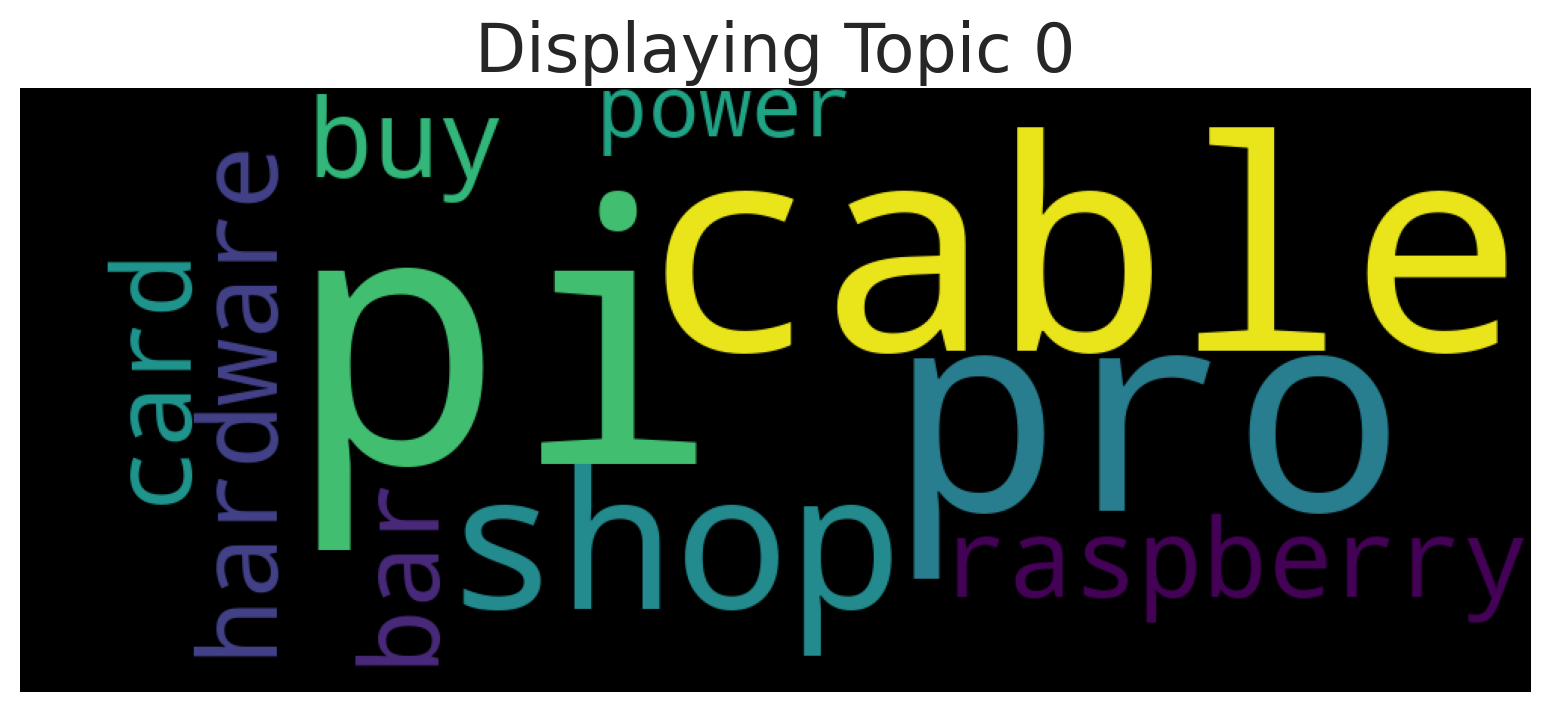

None


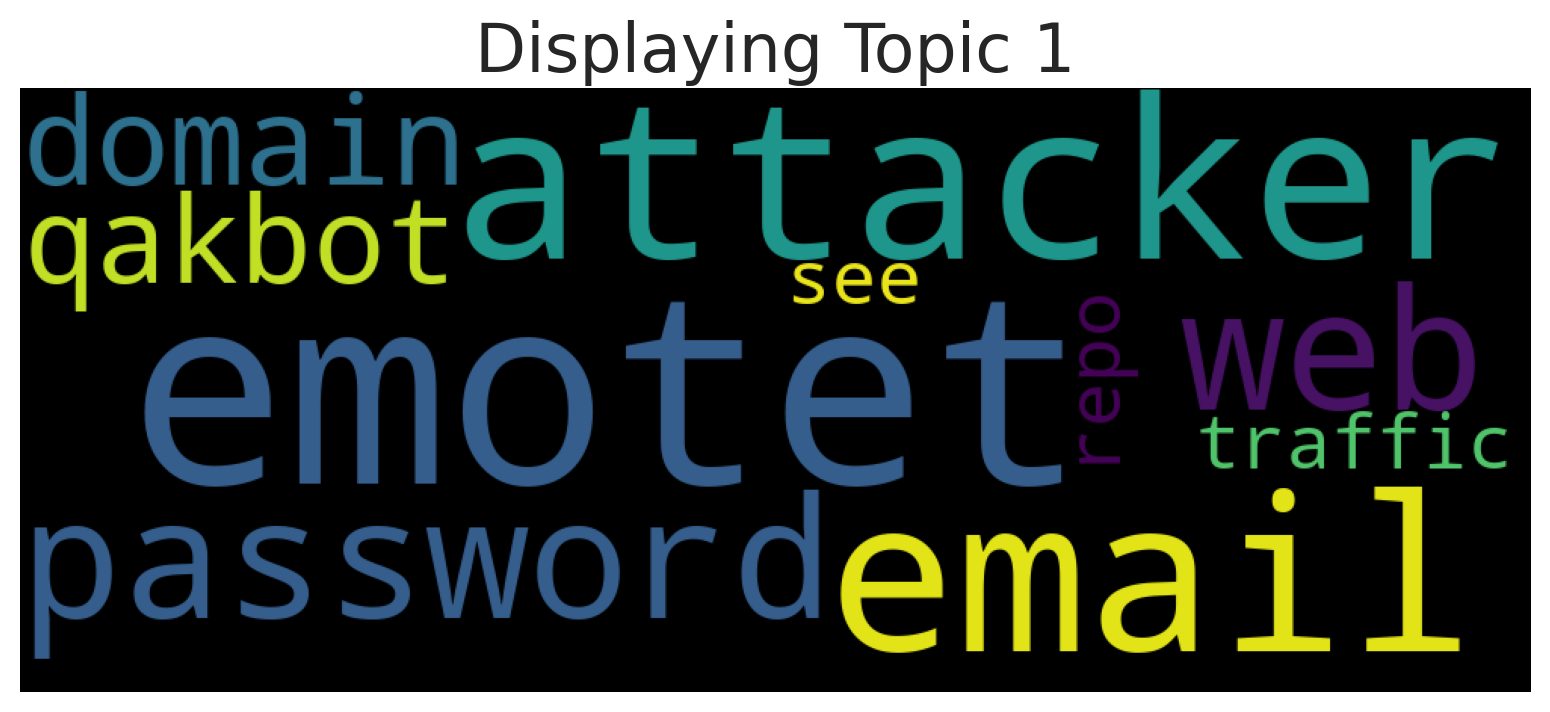

None


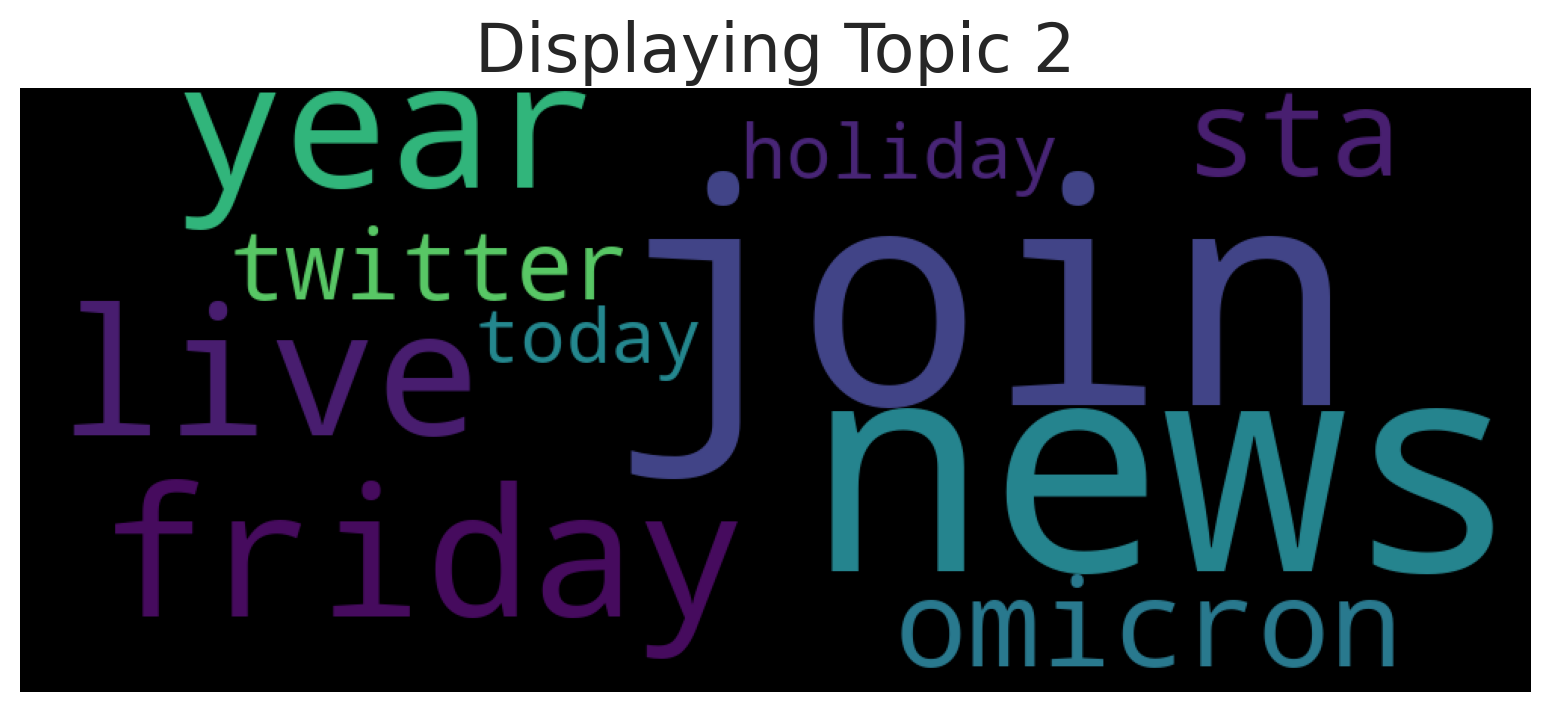

None


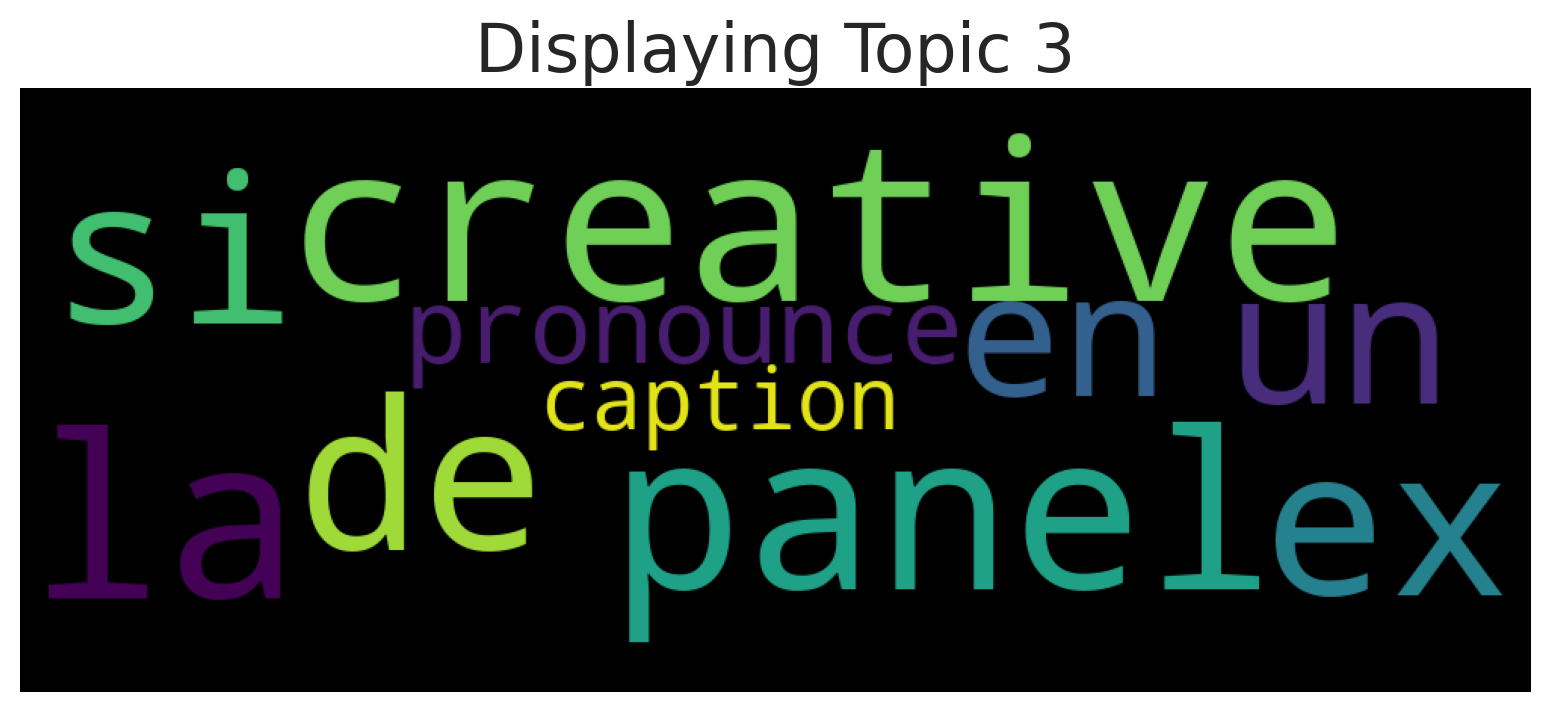

None


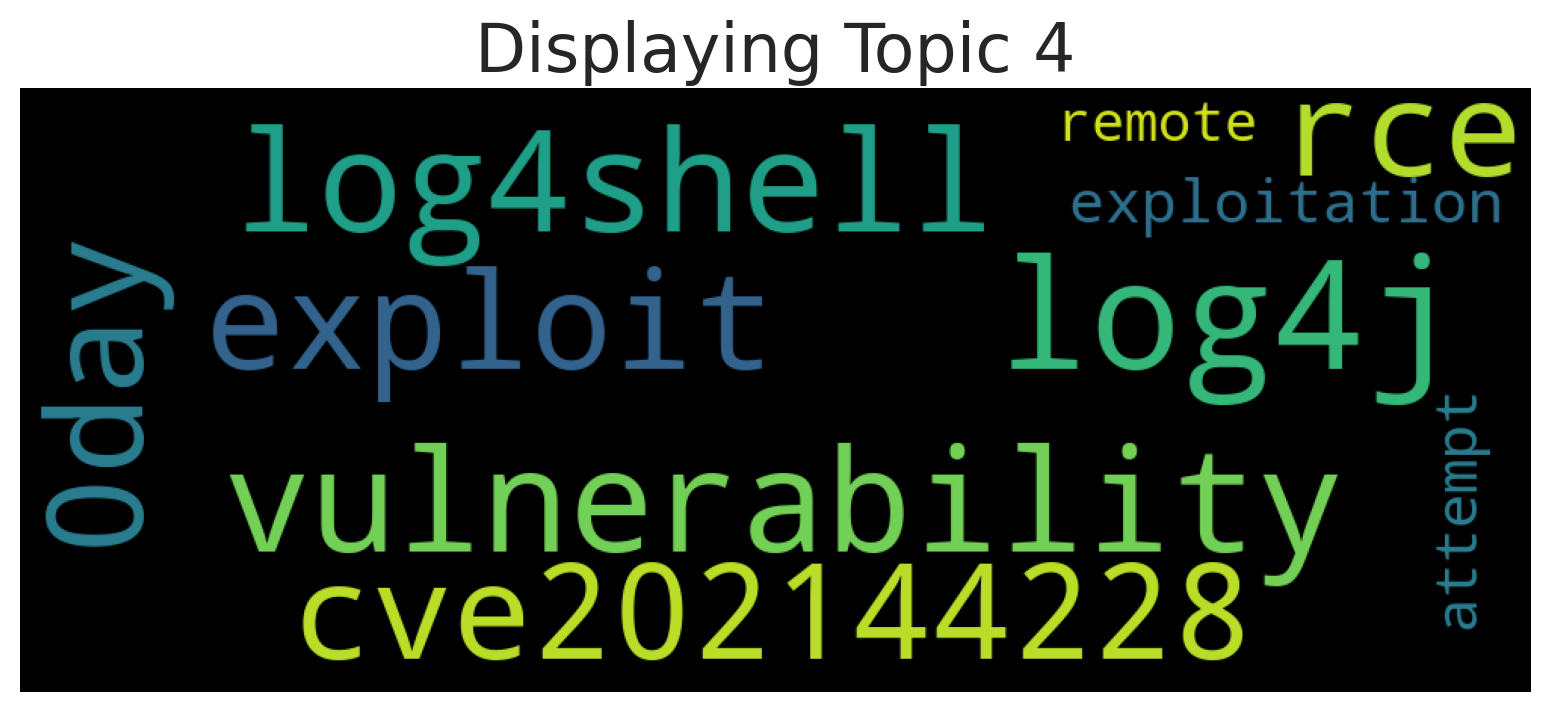

None


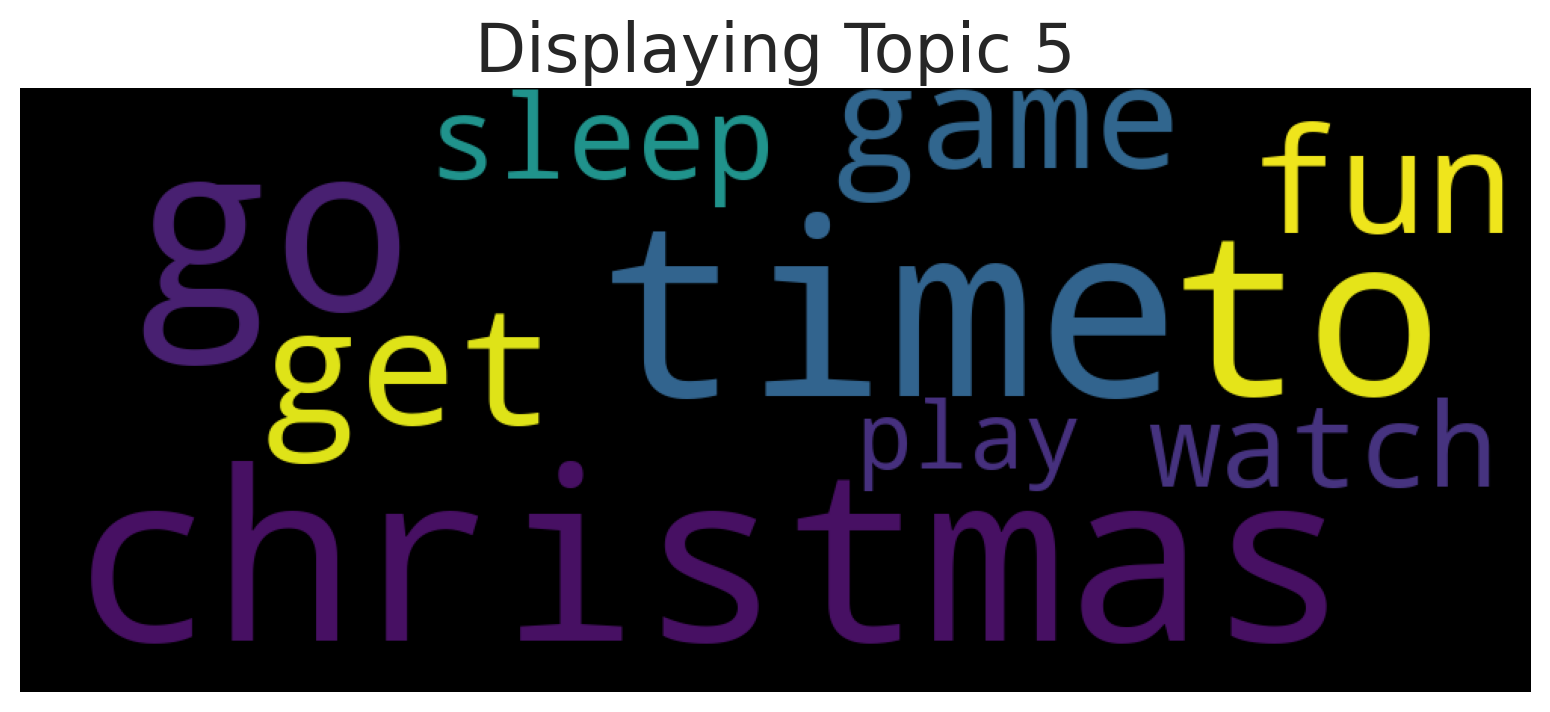

None


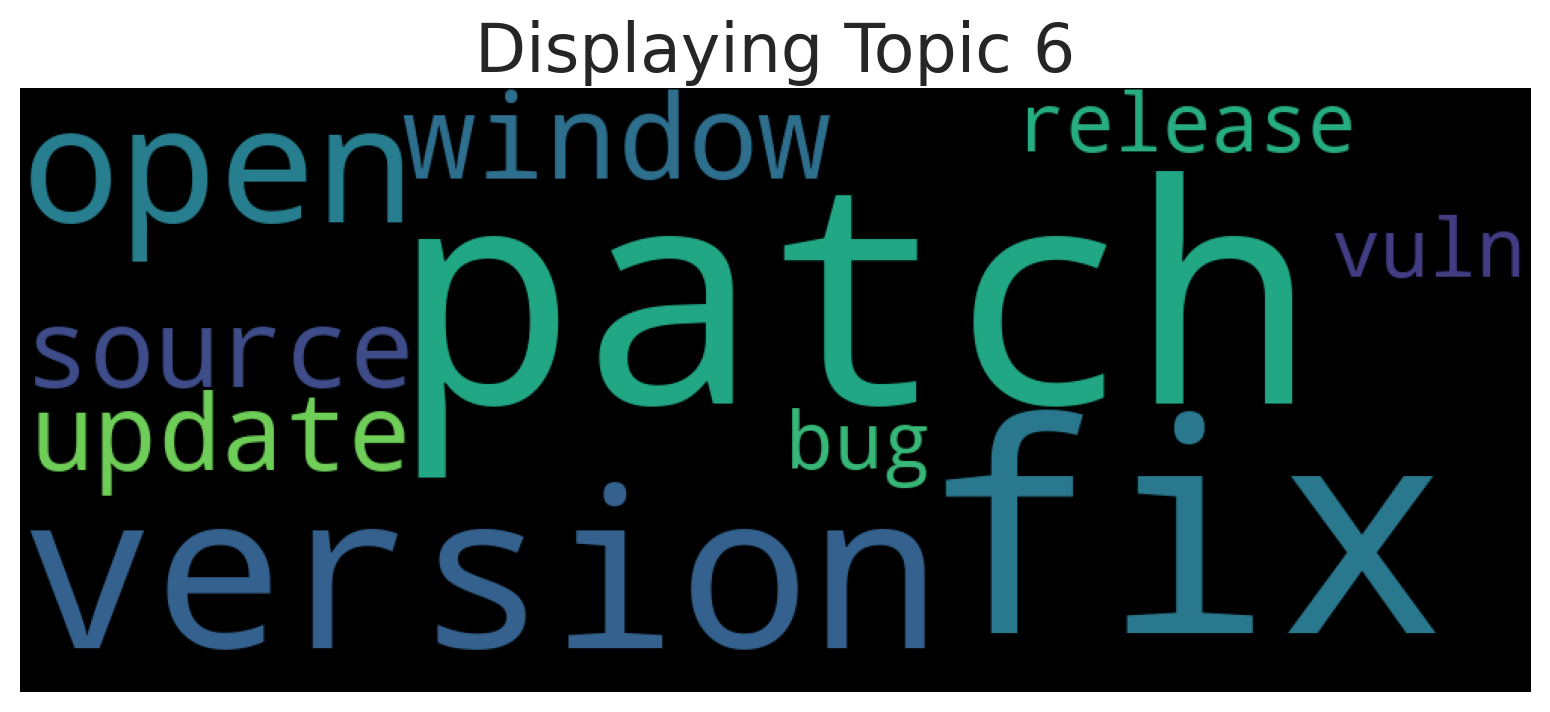

None


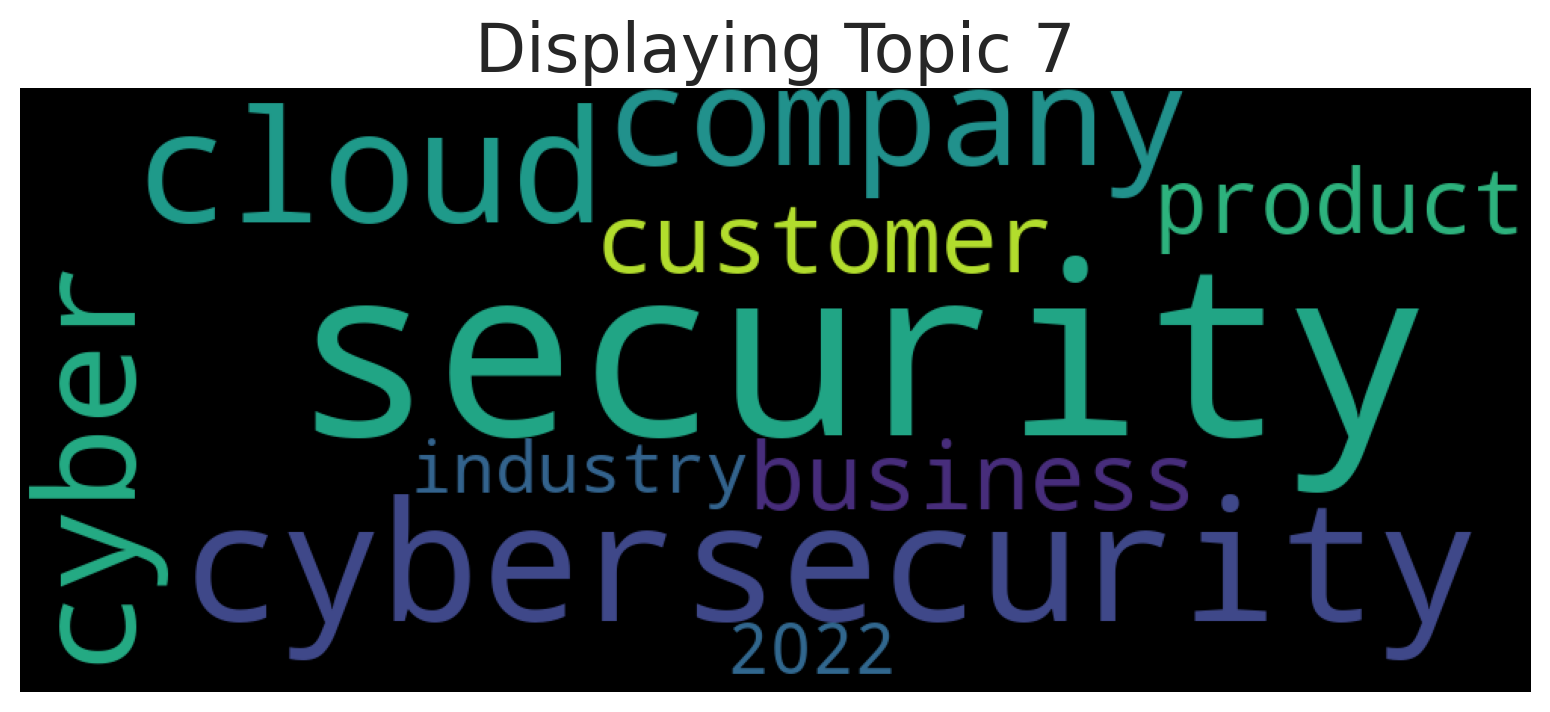

None


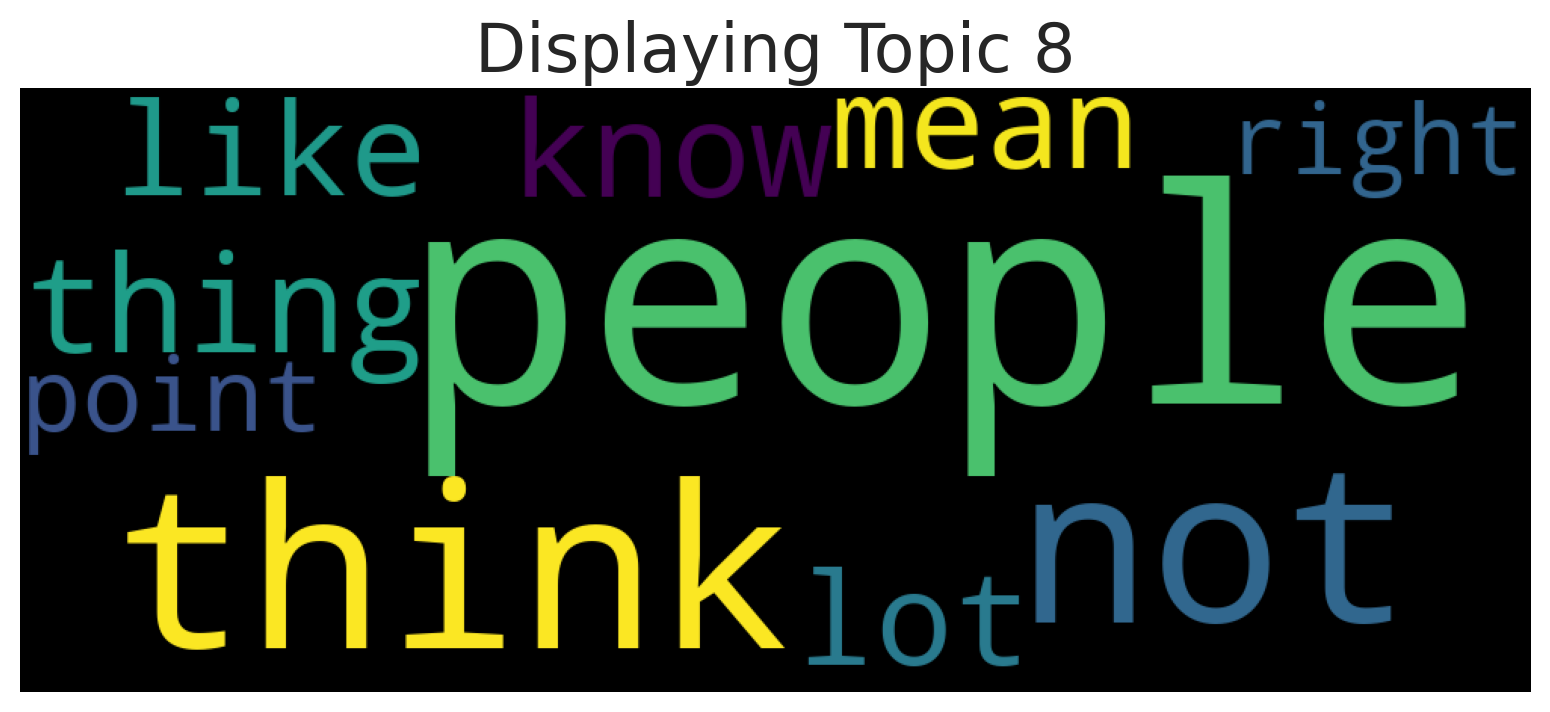

None


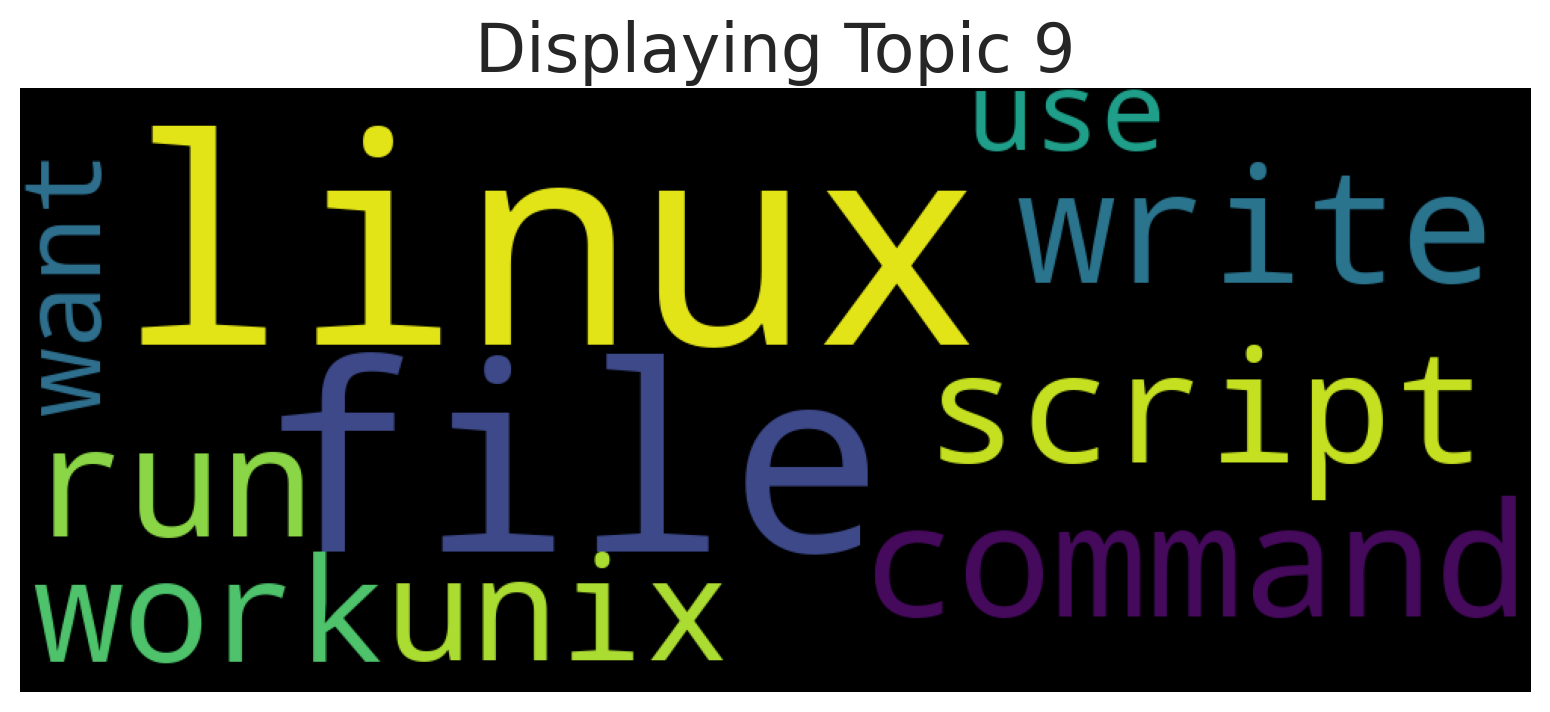

None


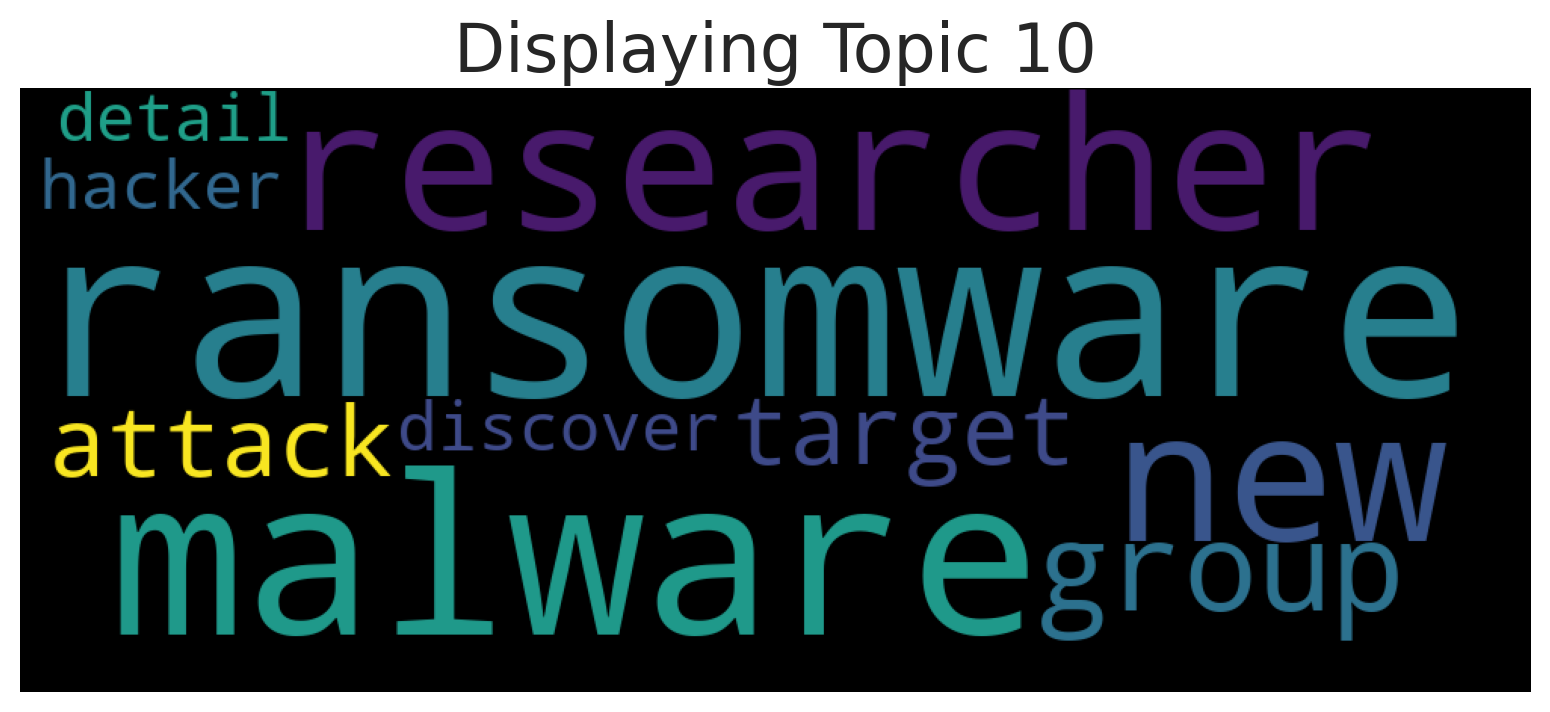

None


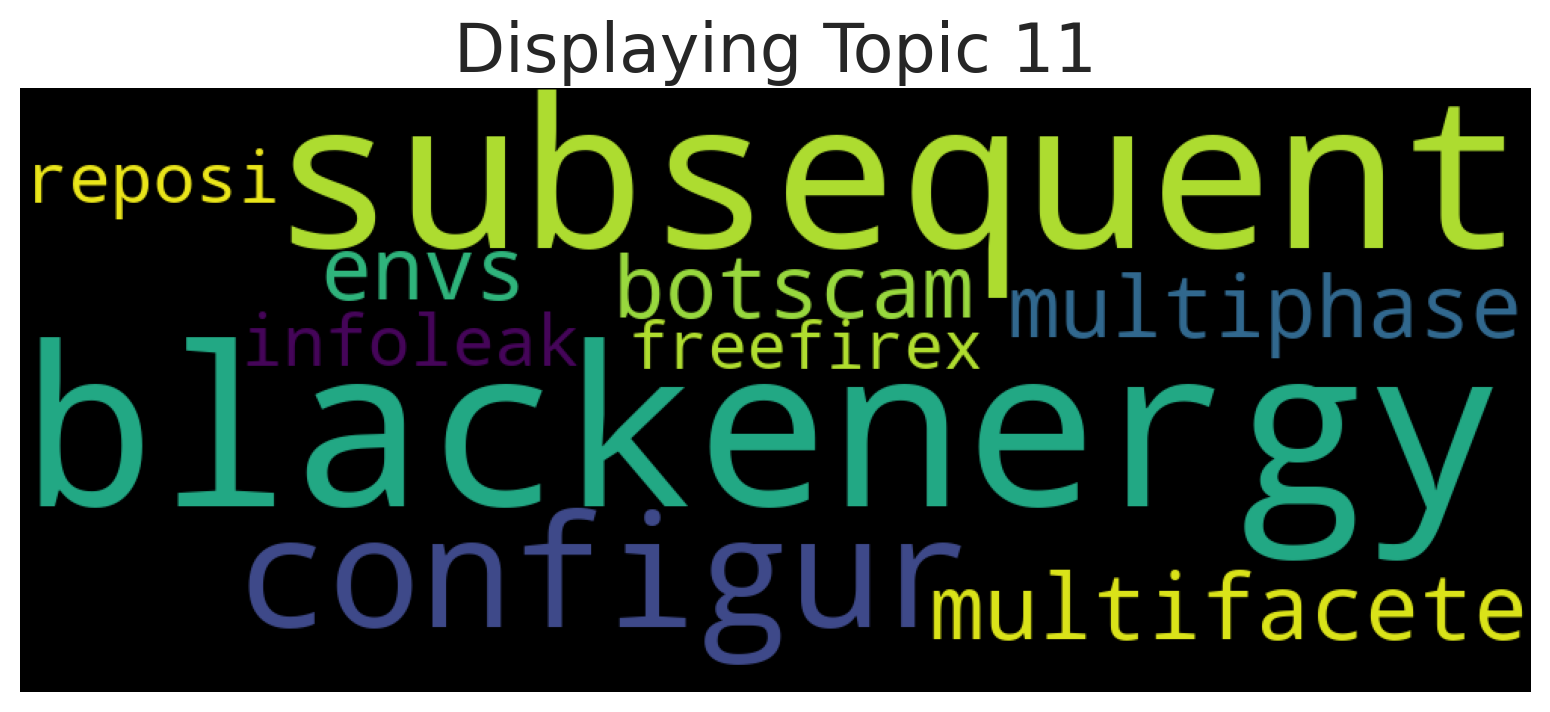

None


In [ ]:
for i in range(num_topics):
  print(ctm.get_wordcloud(i, 10))

In [ ]:
ctm_toc_list = ctm.get_topic_lists(num_topics)
print(ctm_toc_list)
with open("sbert_ctm_top_list.pkl", "wb") as fp:   #Pickling
    pickle.dump(ctm_toc_list, fp)

[['pi', 'cable', 'pro', 'shop', 'raspberry', 'card', 'buy', 'hardware', 'bar', 'power', 'speed', 'computer'], ['emotet', 'attacker', 'email', 'password', 'web', 'domain', 'qakbot', 'traffic', 'see', 'repo', 'url', 'send'], ['join', 'news', 'friday', 'live', 'year', 'omicron', 'sta', 'twitter', 'holiday', 'today', 'tomorrow', 'week'], ['la', 'creative', 'panel', 'de', 'ex', 'si', 'un', 'en', 'pronounce', 'caption', 'toon', 'para'], ['log4j', 'vulnerability', 'log4shell', 'exploit', 'rce', '0day', 'cve202144228', 'exploitation', 'attempt', 'remote', 'code', 'execution'], ['time', 'christmas', 'go', 'to', 'get', 'game', 'fun', 'sleep', 'watch', 'play', 'kid', 'night'], ['patch', 'fix', 'version', 'open', 'window', 'source', 'update', 'release', 'vuln', 'bug', 'defender', 'amp'], ['security', 'cybersecurity', 'cloud', 'company', 'cyber', 'customer', 'business', 'product', 'industry', '2022', 'team', 'infosec'], ['people', 'think', 'not', 'thing', 'know', 'like', 'lot', 'mean', 'point', 'ri

In [ ]:
print("evaluation for CTM")
print(f"evaluation for LDA when K={num_topics}")
#cv_score,w2v_score,c_uci_score, c_npmi_score)
print(calc_topic_coherence(ctm_toc_list, tokenized_text, df_dic, emb_path=word2vec_path,taskname=None,sents4emb=None,calc4each=False))
print(calc_topic_diversity(ctm_toc_list))
print(calc_cw2v(ctm_toc_list, tokenized_text, df_dic, emb_path=SecVul_path))
print(calc_similarity_sentroid(ctm_toc_list,word2vec_path ))
print(calc_similarity_sentroid(ctm_toc_list, SecVul_path))

evaluation for CTM
evaluation for LDA when K=12
((0.3631976586119617, 0.5036381, -4.573379627879599, -0.09564177114898238), (None, None, None, None))
1.0
0.6603003


AttributeError: ignored

### NMF implementation from Gensim
ref: https://radimrehurek.com/gensim/models/nmf.html

In [ ]:
from gensim.models import CoherenceModel, TfidfModel
from gensim.models import Nmf
from gensim.models.nmf import Nmf as GensimNmf


# create td-idf feature for nmf
tfidf = TfidfModel(dictionary=df_dic)
train_corpus = [
    df_dic.doc2bow(document)
    for document
    in tokenized_text
]

train_corpus_tfidf = list(tfidf[train_corpus])

time_start = time.perf_counter()
nmf = GensimNmf(
    corpus=train_corpus_tfidf,
    num_topics=num_topics,
    id2word=df_dic,
    chunksize=1000,
    passes=5,
    eval_every=10,
    minimum_probability=0,
    random_state=2,
    kappa=1,
)
time_elapsed = (time.perf_counter() - time_start)
memMb=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
print ("%5.1f secs %5.1f MByte" % (time_elapsed,memMb))
nmf.show_topics()

  5.1 secs   1.1 MByte


[(6,
  '0.024*"good" + 0.015*"read" + 0.015*"repo" + 0.013*"version" + 0.012*"thread" + 0.010*"file" + 0.008*"get" + 0.007*"need" + 0.007*"tell" + 0.007*"fix"'),
 (2,
  '0.036*"ransomware" + 0.021*"security" + 0.017*"attack" + 0.013*"want" + 0.013*"threat" + 0.011*"great" + 0.008*"group" + 0.008*"big" + 0.007*"conti" + 0.006*"hit"'),
 (5,
  '0.051*"people" + 0.045*"time" + 0.024*"thing" + 0.013*"lot" + 0.008*"sta" + 0.006*"new" + 0.004*"take" + 0.004*"tweet" + 0.004*"help" + 0.004*"talk"'),
 (10,
  '0.050*"log4j" + 0.030*"log4shell" + 0.021*"vulnerability" + 0.017*"exploit" + 0.012*"find" + 0.012*"rce" + 0.011*"code" + 0.011*"patch" + 0.009*"cve202144228" + 0.008*"vulnerable"'),
 (4,
  '0.065*"know" + 0.032*"year" + 0.030*"new" + 0.009*"need" + 0.006*"let" + 0.006*"hacker" + 0.006*"exploit" + 0.005*"ago" + 0.005*"window" + 0.004*"attacker"'),
 (8,
  '0.037*"cybersecurity" + 0.030*"join" + 0.023*"event" + 0.022*"dark" + 0.022*"2022" + 0.020*"reading" + 0.019*"free" + 0.018*"december" + 

In [ ]:
# Get topic list 
nmf_top_list = []
for topic_idx, topic in enumerate(nmf.get_topics()):
    nmf_top_list.append([df_dic[i] for i in topic.argsort()[:-10 - 1:-1]])
    #nmf_top_list.append(message)
print(nmf_top_list)

# with open("nmf12.pkl", "wb") as fp:   #Pickling
#     pickle.dump(nmf, fp)

# with open("nmf_topic_list.pkl", "wb") as fp:   #Pickling
#     pickle.dump(nmf_top_list, fp)


[['yeah', 'have', 'sure', 'good', 'mean', 'dude', 'happy', 'hope', 'see', 'oh'], ['go', 'to', 'get', 'bad', 'guess', 'right', 'email', 'weekend', 'sta', 'say'], ['ransomware', 'security', 'attack', 'want', 'threat', 'great', 'group', 'big', 'conti', 'hit'], ['not', 'will', 'sure', 'oh', 'log', 'wait', 'vulnerable', 'know', 'forget', 'want'], ['know', 'year', 'new', 'need', 'let', 'hacker', 'exploit', 'ago', 'window', 'attacker'], ['people', 'time', 'thing', 'lot', 'sta', 'new', 'take', 'tweet', 'help', 'talk'], ['good', 'read', 'repo', 'version', 'thread', 'file', 'get', 'need', 'tell', 'fix'], ['like', 'look', 'thank', 'share', 'see', 'feel', 'have', 'try', 'forward', 'sound'], ['cybersecurity', 'join', 'event', 'dark', '2022', 'reading', 'free', 'december', 'viual', 'outlook'], ['work', 'day', 'nice', 'today', 'wehackhealth', 'great', 'mate', 'happy', 'xmas', 'thing'], ['log4j', 'log4shell', 'vulnerability', 'exploit', 'find', 'rce', 'code', 'patch', 'cve202144228', 'vulnerable'], ['

In [ ]:
print("evaluation for NMF")
print(calc_topic_coherence(nmf_top_list, tokenized_text, df_dic, emb_path=word2vec_path, taskname=None, sents4emb=None, calc4each=False))
#(0.3438866179449738, 0.5135958, -1.3134836222056407, -0.011362068336148258)
print(calc_topic_diversity(nmf_top_list))
print(calc_cw2v(nmf_top_list, tokenized_text, df_dic, emb_path=SecVul_path))
#print(calc_similarity_sentroid(nmf_top_list))
print(calc_similarity_sentroid(nmf_top_list, SecVul_path))

evaluation for NMF
((0.3477995649141914, 0.49606204, -1.590064243643874, 0.008868022325341106), (None, None, None, None))
0.8333333333333334
0.6935312
0.41326123003039744


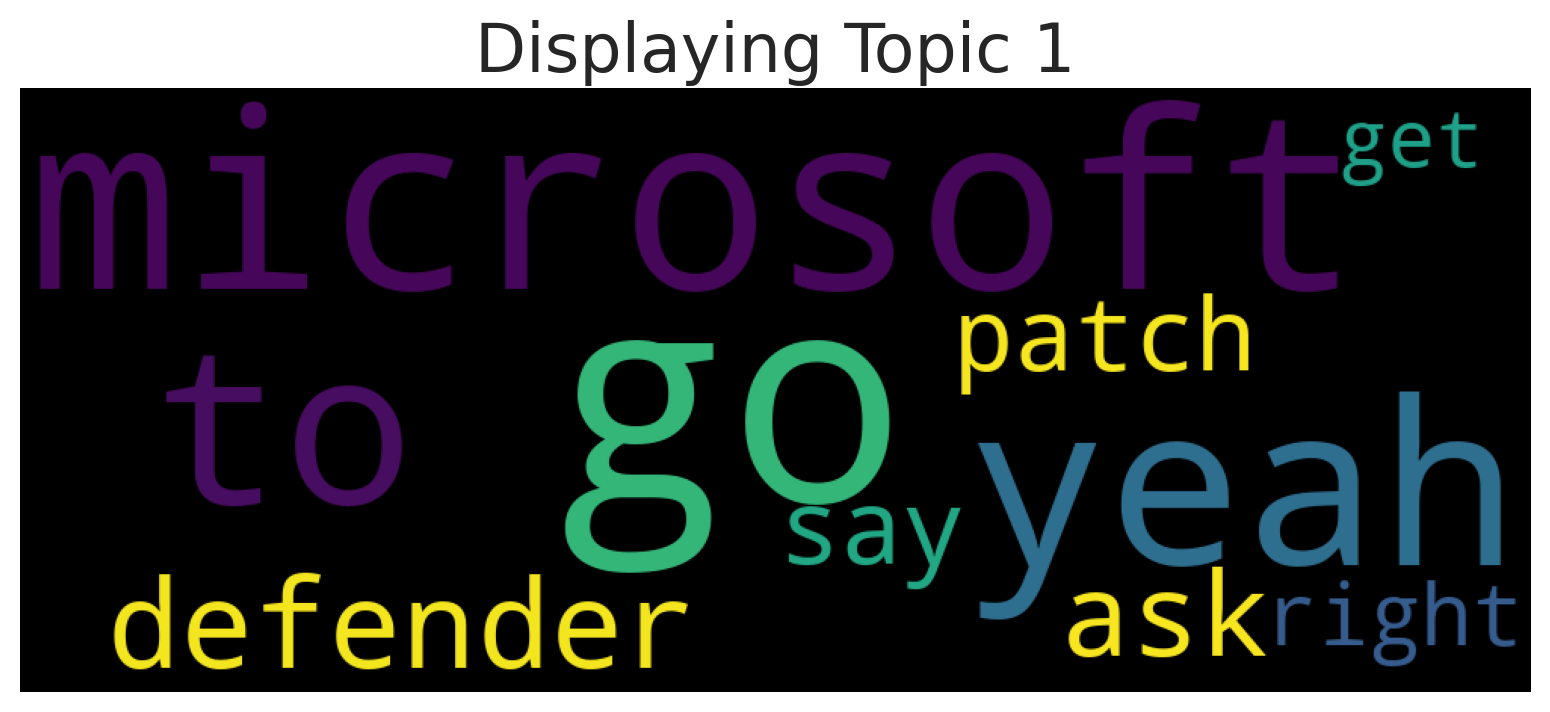

<Figure size 432x288 with 0 Axes>

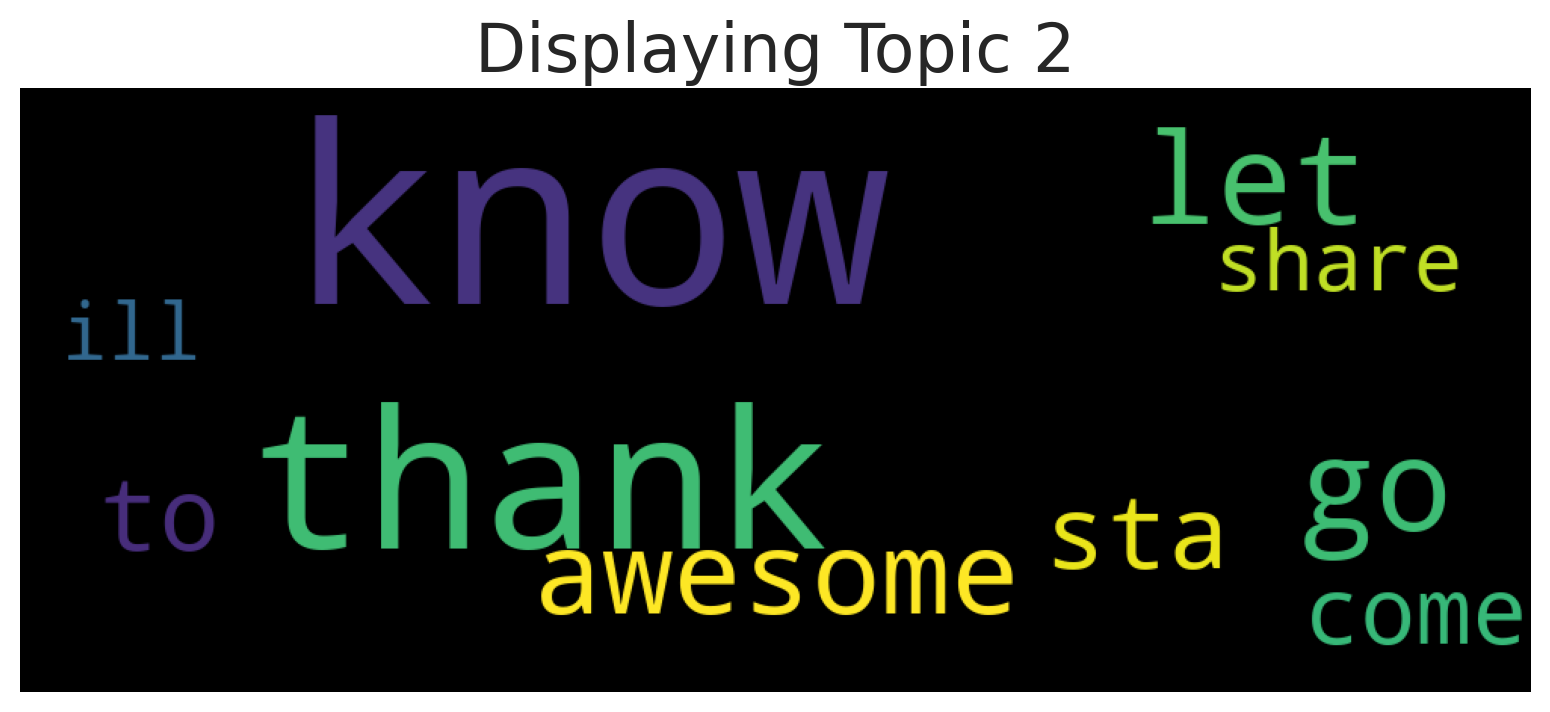

<Figure size 432x288 with 0 Axes>

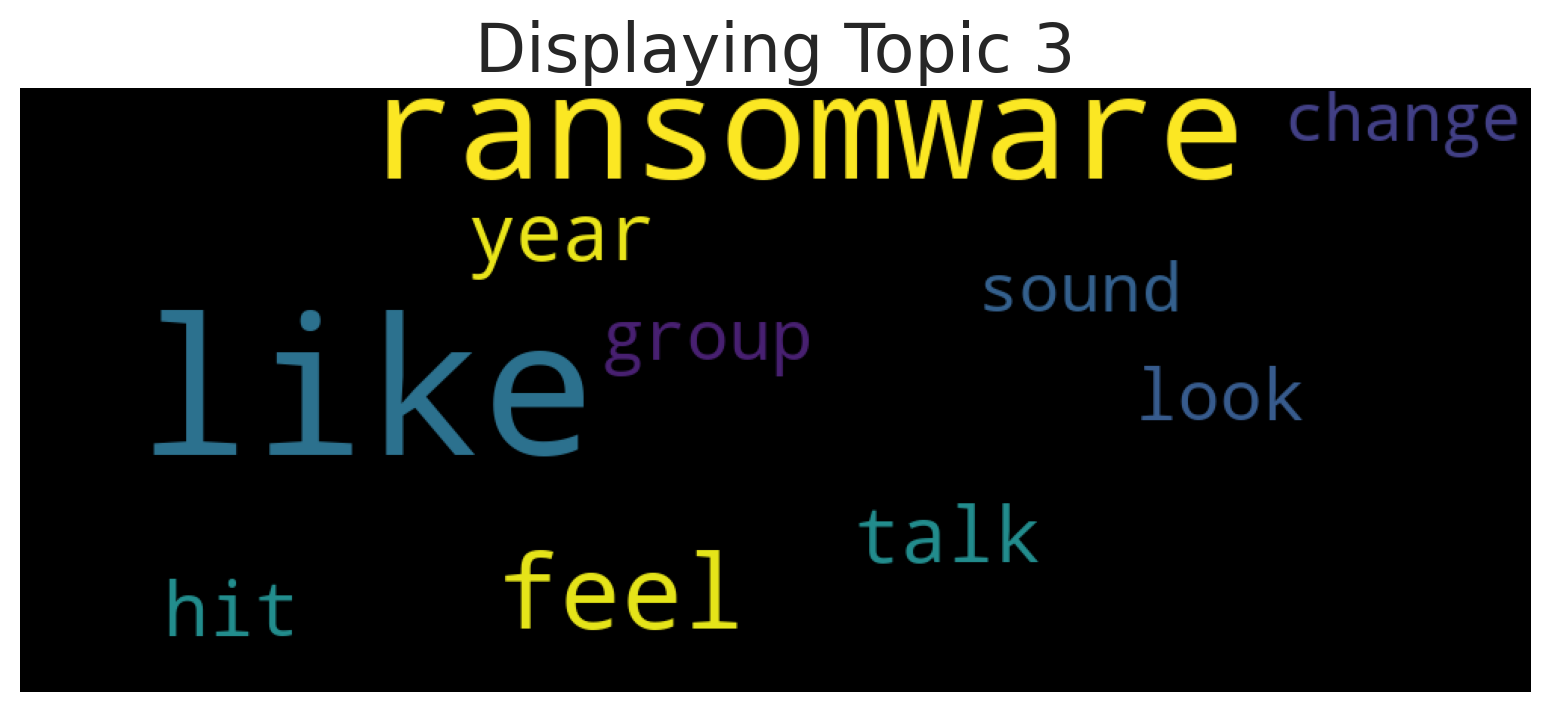

<Figure size 432x288 with 0 Axes>

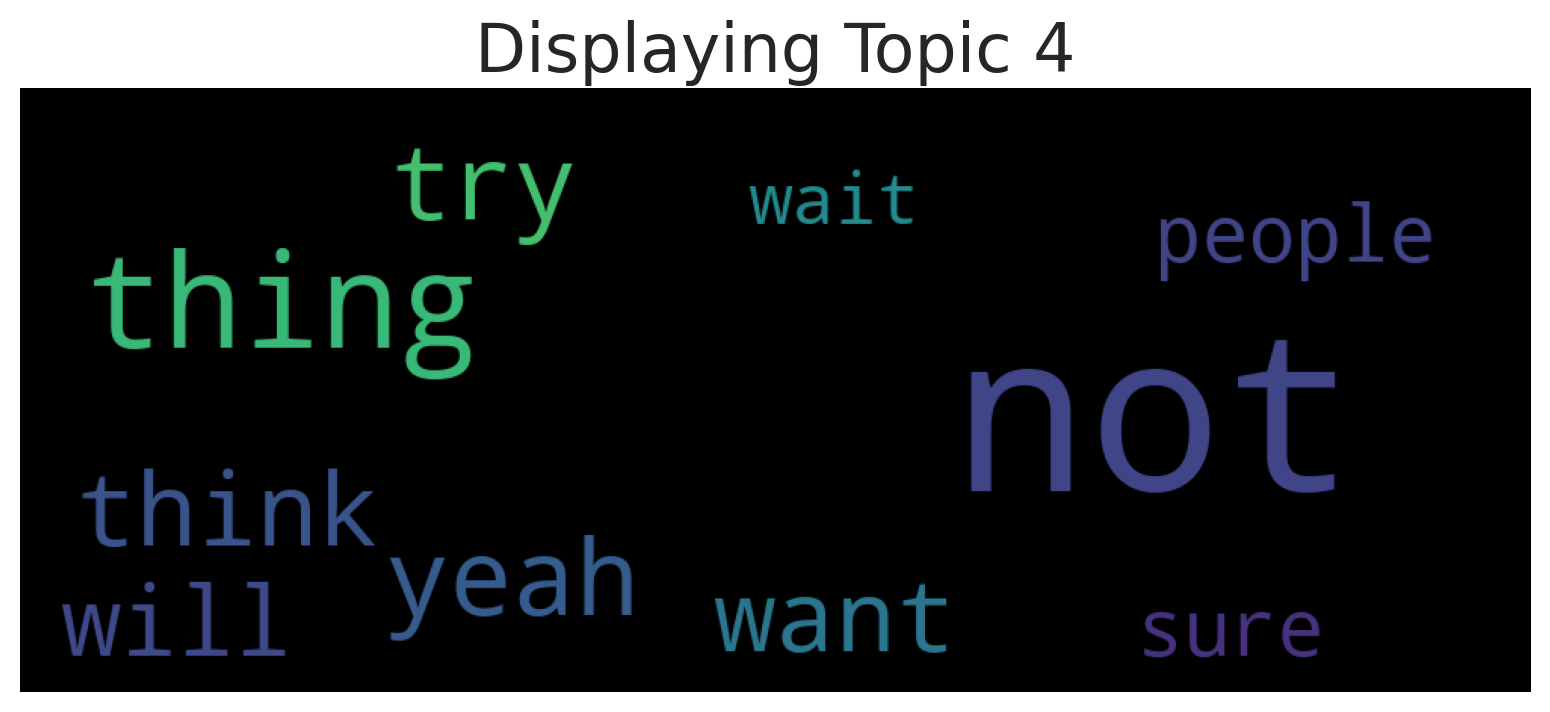

<Figure size 432x288 with 0 Axes>

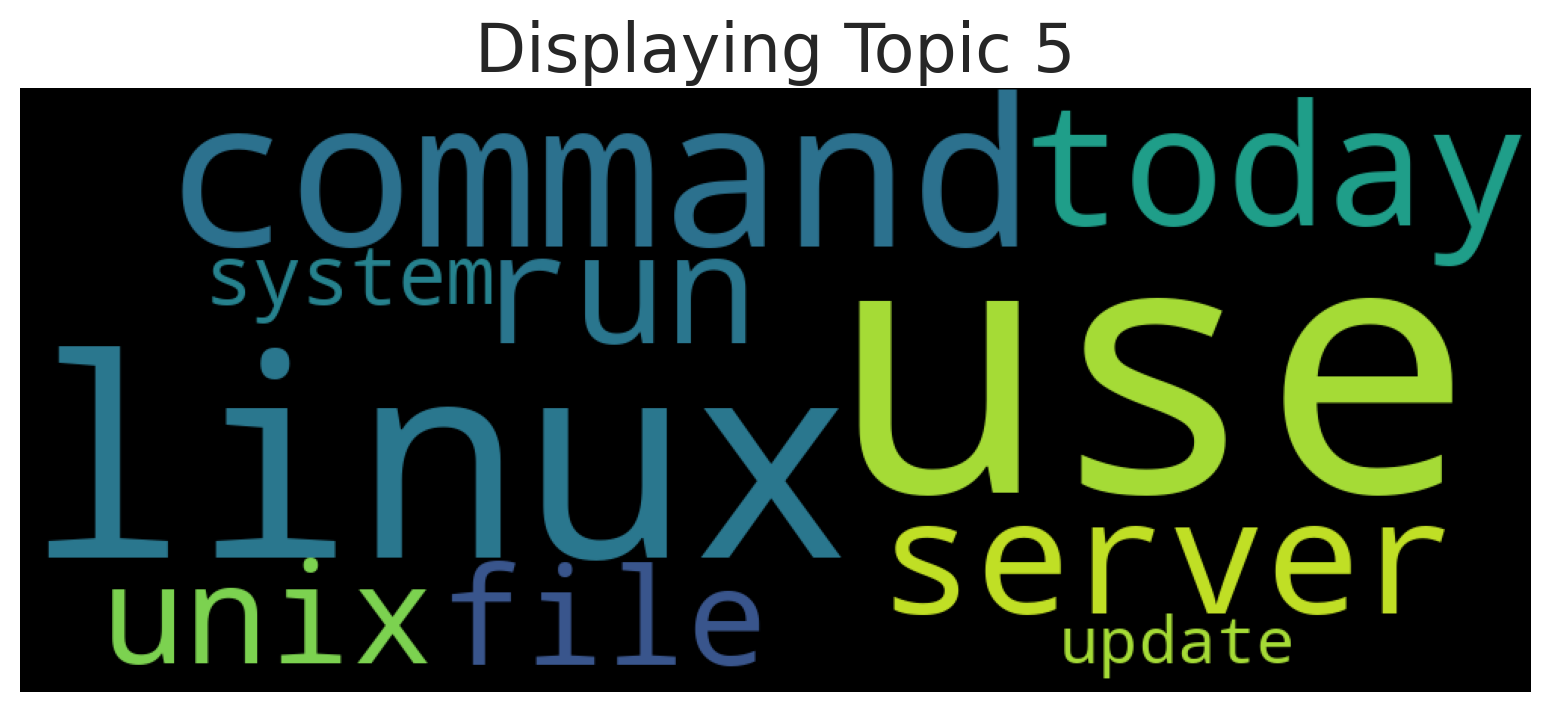

<Figure size 432x288 with 0 Axes>

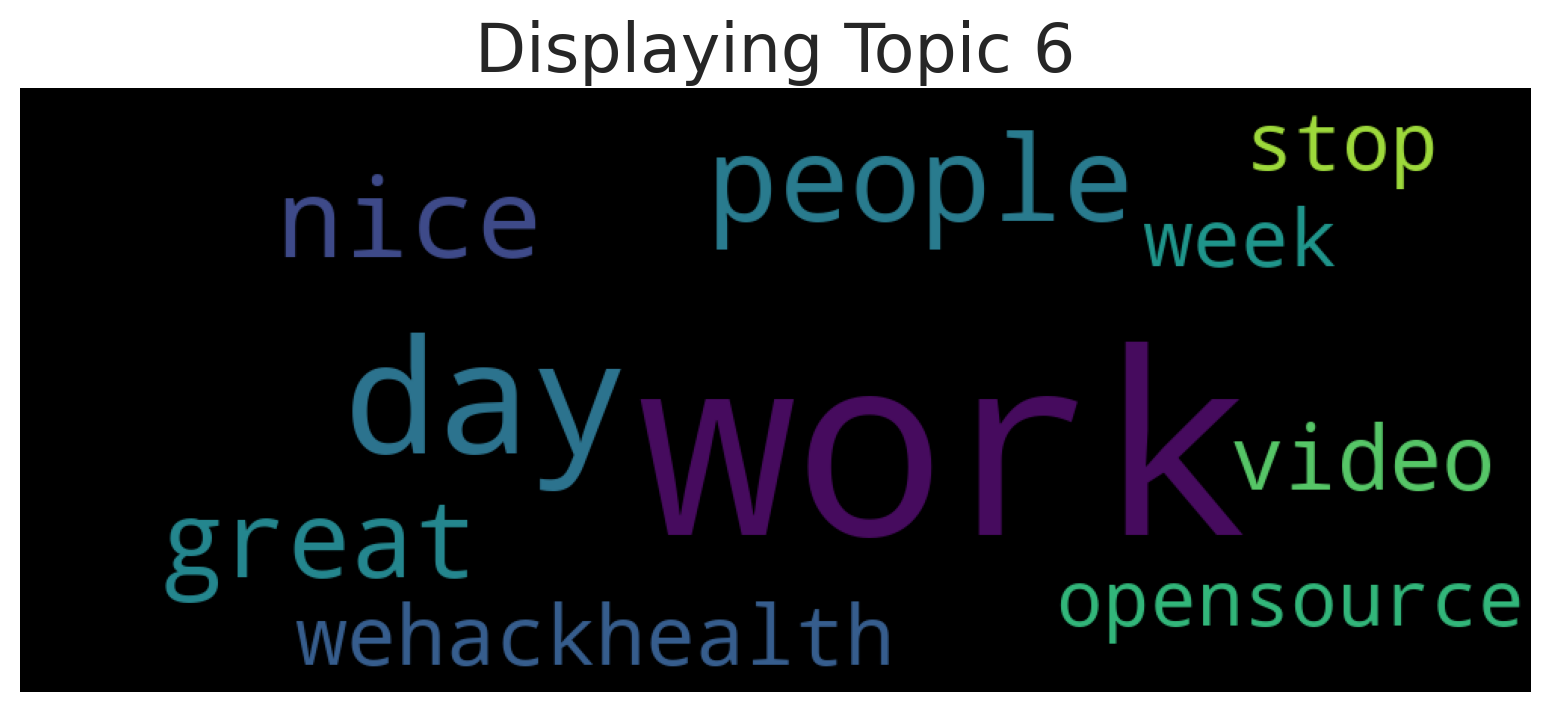

<Figure size 432x288 with 0 Axes>

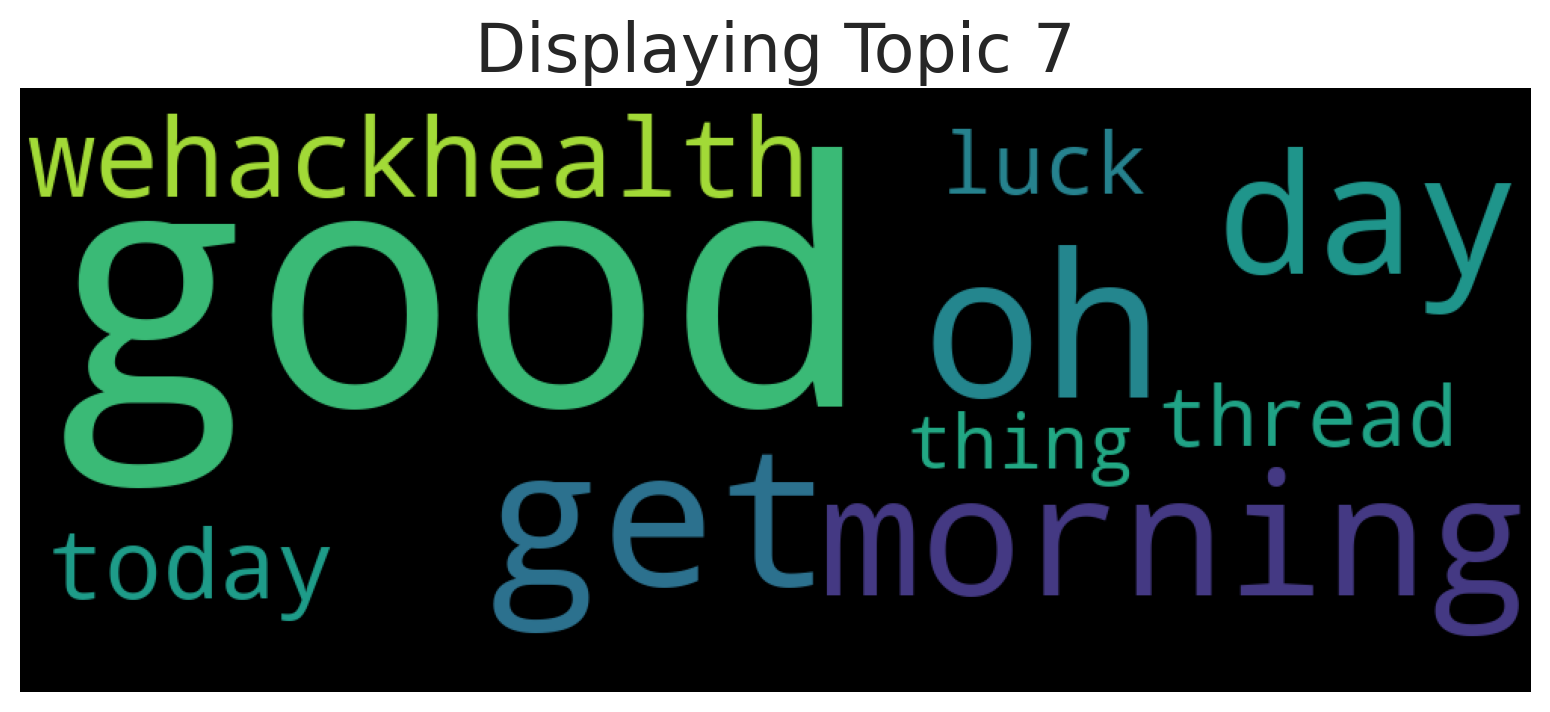

<Figure size 432x288 with 0 Axes>

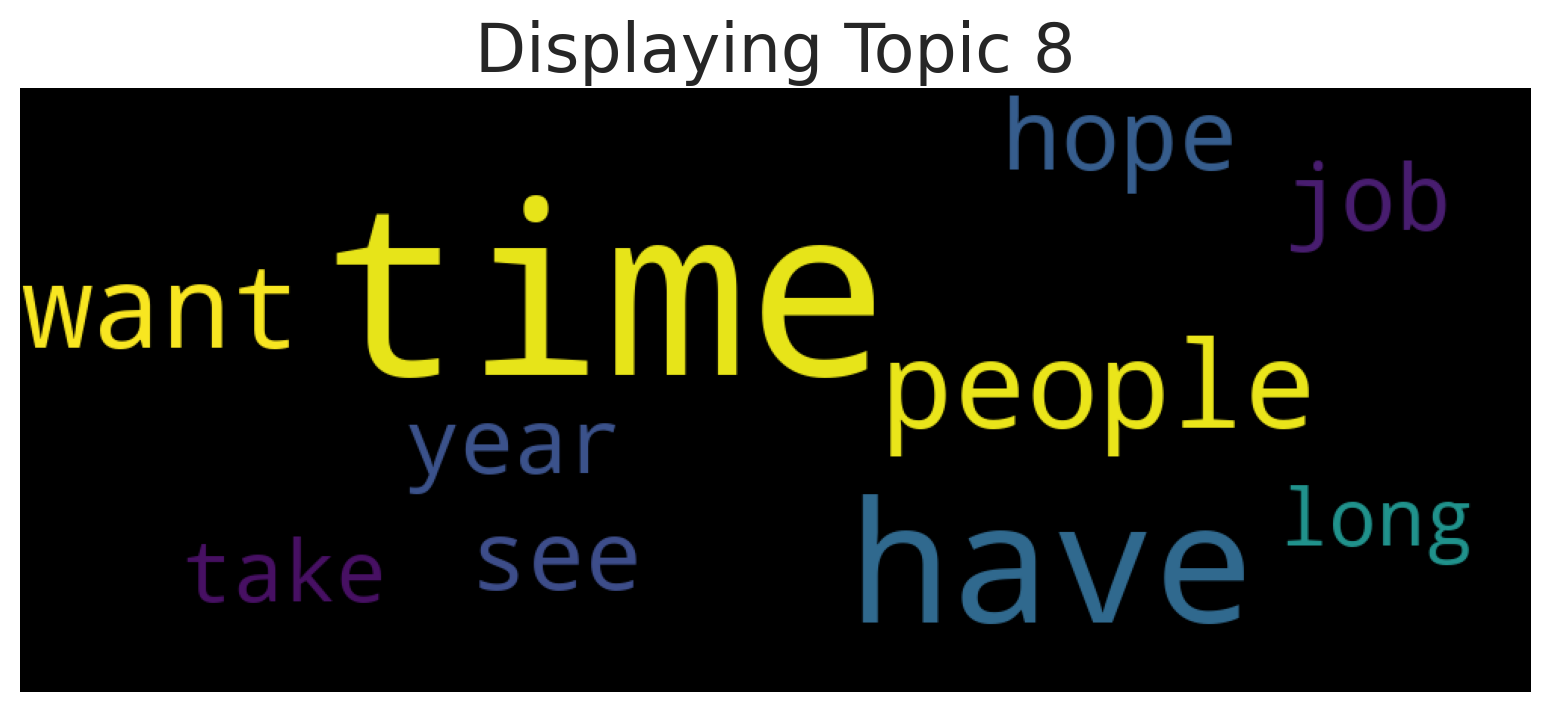

<Figure size 432x288 with 0 Axes>

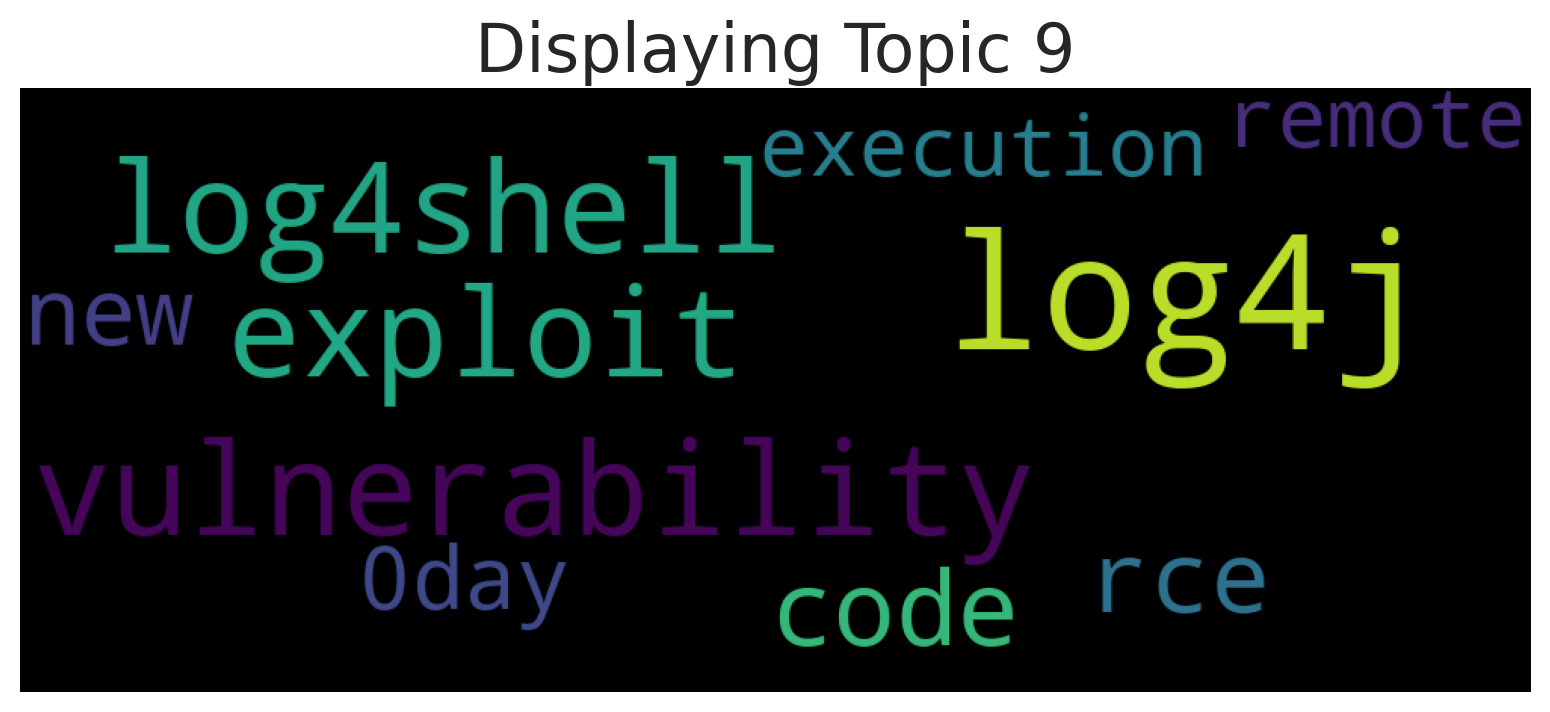

<Figure size 432x288 with 0 Axes>

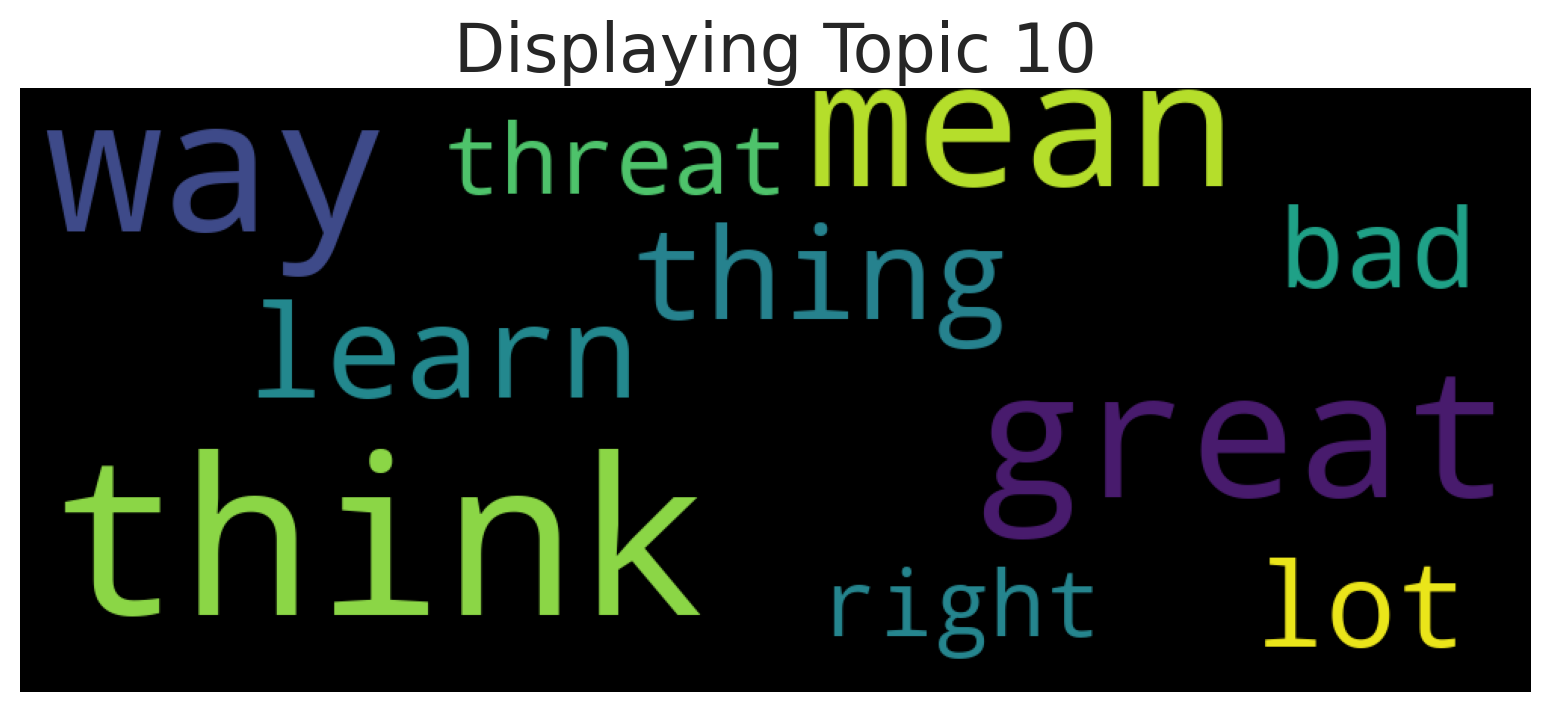

<Figure size 432x288 with 0 Axes>

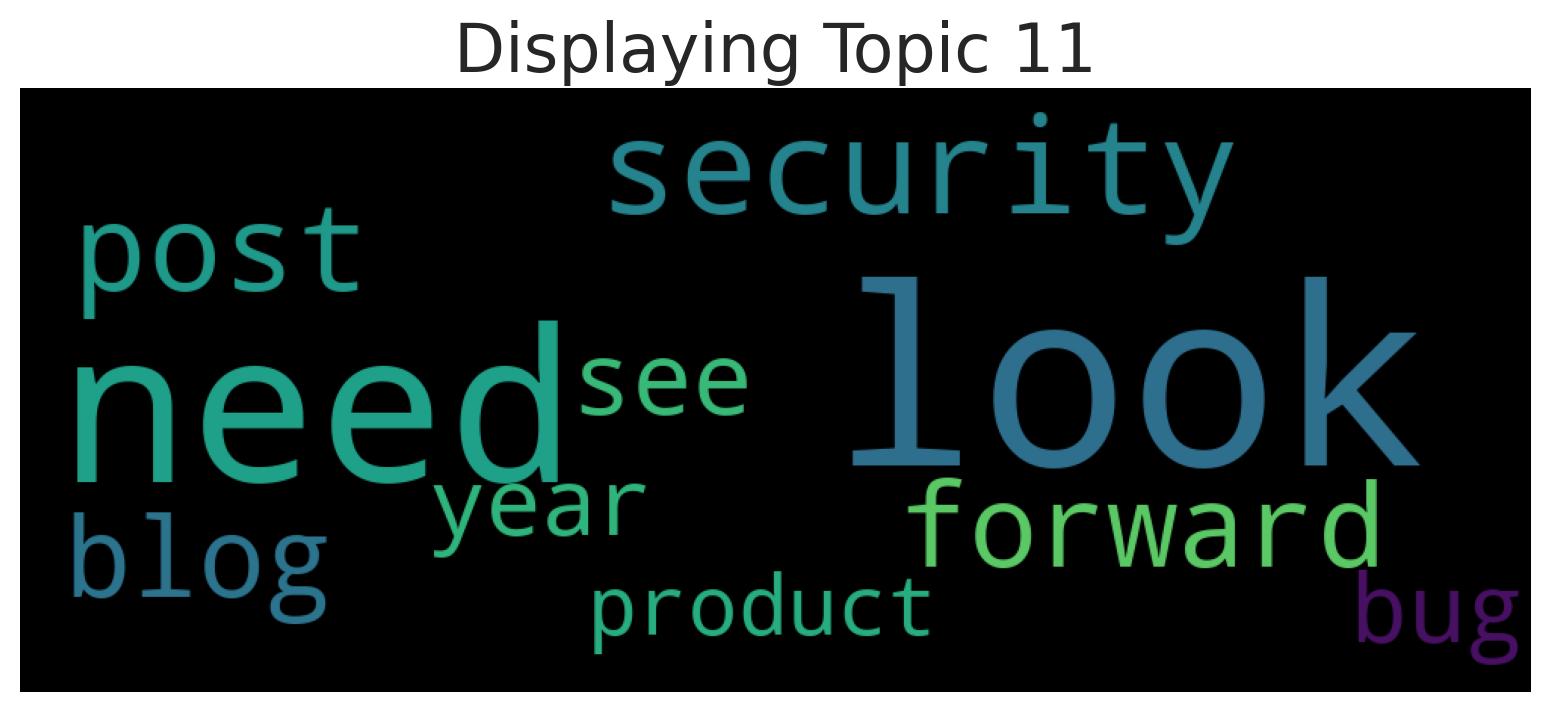

<Figure size 432x288 with 0 Axes>

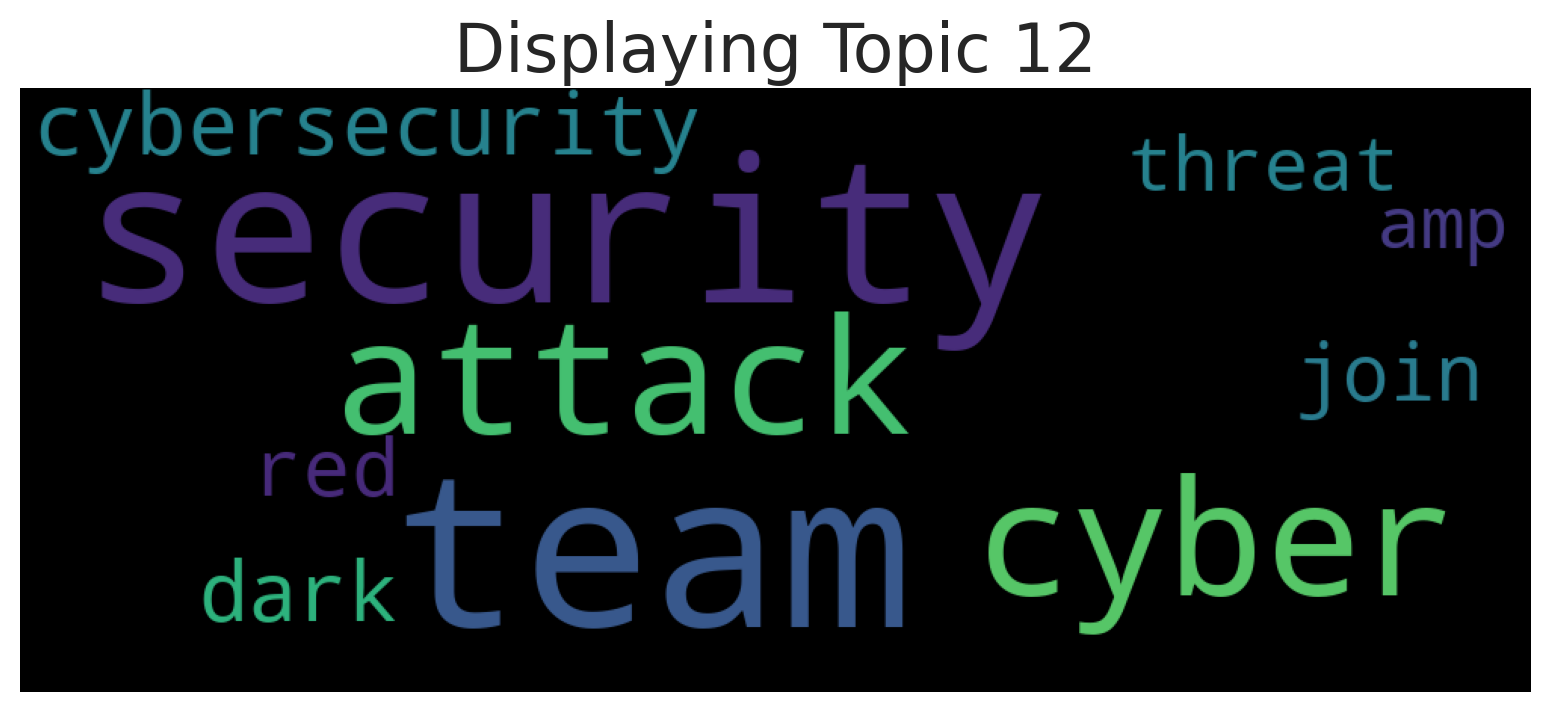

<Figure size 432x288 with 0 Axes>

In [ ]:
nmf_topics = nmf.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)
generate_wordclound(nmf_topics)

### LDA Implementation from Gensim
ref: https://radimrehurek.com/gensim/models/ldamodel.html

In [ ]:
# Run LDA with BOW feature 
time_start = time.perf_counter()
lda_model = gensim.models.LdaMulticore(gensim_corpus,
                                      num_topics=num_topics, 
                                      id2word = df_dic, 
                                      passes = 20,
                                      workers=4,
                                      minimum_probability = 0,
                                      random_state = 1
                                          )

# insert code here ...
time_elapsed = (time.perf_counter() - time_start)
memMb=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
print ("%5.1f secs %5.1f MByte" % (time_elapsed,memMb))

# Display topics
for topic_idx, topic in enumerate(lda_model.get_topics()):
    message = "Topic %d: " % (topic_idx+1)
    message += ", ".join([df_dic[i] for i in topic.argsort()[:-10 - 1:-1]])
    print(message)


# with open("lda12.pkl", "wb") as fp:   #Pickling
#     pickle.dump(lda_model, fp)

109.0 secs   4.3 MByte
Topic 1: people, not, good, work, know, week, talk, infosec, thing, problem
Topic 2: 0day, not, know, to, go, code, exploit, get, system, rce
Topic 3: new, need, year, time, ransomware, log4j, add, threat, day, blog
Topic 4: yeah, not, issue, oh, wait, new, man, know, defender, hat
Topic 5: think, get, like, security, not, good, time, work, team, feel
Topic 6: good, security, email, team, look, like, new, yeah, malware, send
Topic 7: not, thing, list, sure, like, use, look, work, window, need
Topic 8: need, work, vmware, tell, attack, not, think, look, team, sta
Topic 9: log4j, vulnerability, exploit, log4shell, server, not, attack, new, threat, ransomware
Topic 10: like, not, see, have, learn, look, find, log4j, ransomware, probably
Topic 11: time, have, year, cyber, new, get, love, happy, want, day
Topic 12: like, day, work, ransomware, linux, today, join, wehackhealth, good, not


In [ ]:
lda_top_list = []
for topic_idx, topic in enumerate(lda_model.get_topics()):
    lda_top_list.append([df_dic[i] for i in topic.argsort()[:-10 - 1:-1]])
    #nmf_top_list.append(message)
 
# with open("lda_topic_list.pkl", "wb") as fp:   #Pickling
#     pickle.dump(lda_top_list, fp)

In [ ]:
print(f"evaluation for LDA when K={num_topics}")
print(calc_topic_coherence(lda_top_list, tokenized_text, df_dic, emb_path=word2vec_path,taskname=None,sents4emb=None,calc4each=False))
print(calc_topic_diversity(lda_top_list))
print(calc_cw2v(lda_top_list, tokenized_text, df_dic, emb_path=SecVul_path))
print(calc_similarity_sentroid(lda_top_list,word2vec_path ))
print(calc_similarity_sentroid(lda_top_list, SecVul_path))

evaluation for LDA when K=12
((0.2419567845315691, 0.51793844, -1.2878790790925592, -0.05809590038626671), (None, None, None, None))
0.5666666666666667
0.71560097
0.19883823980232723
0.46752688192367975


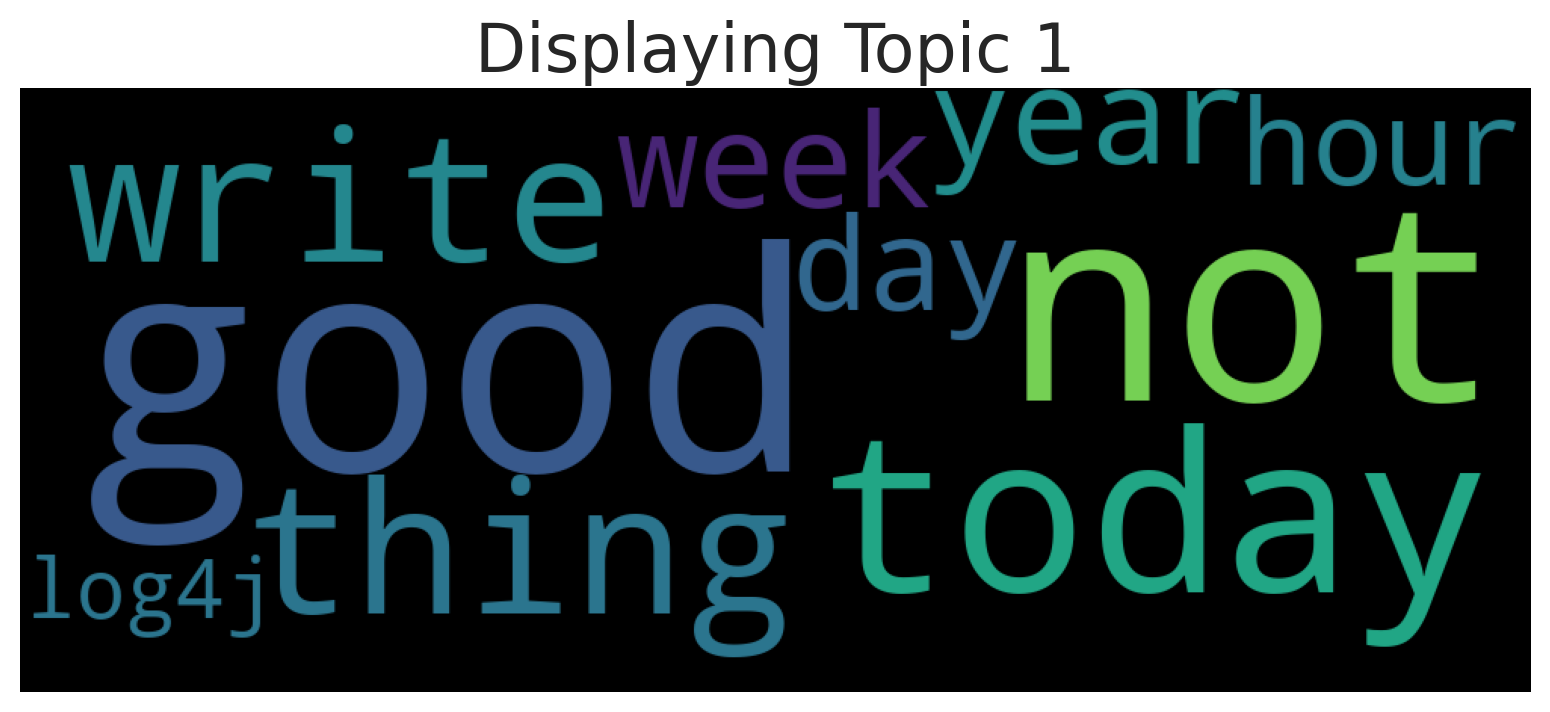

<Figure size 432x288 with 0 Axes>

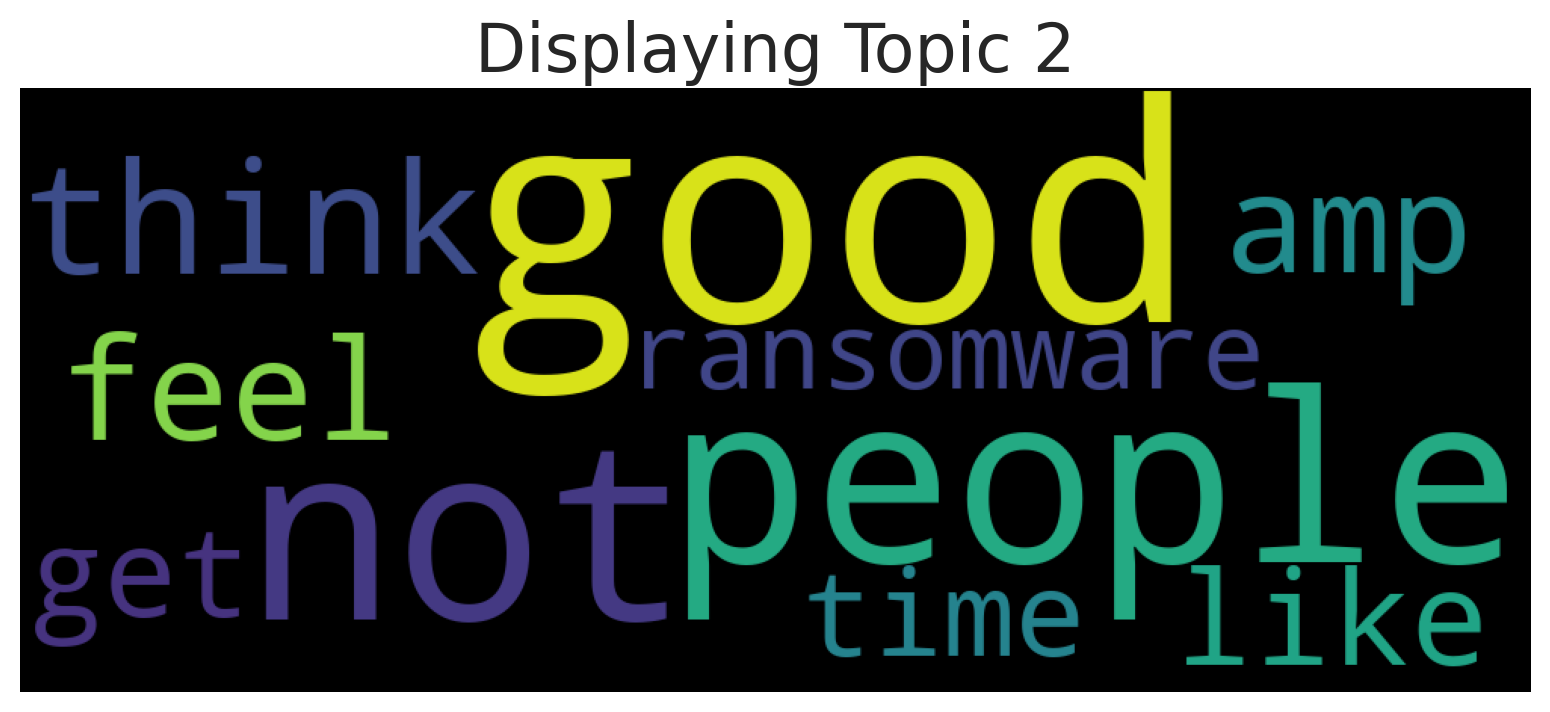

<Figure size 432x288 with 0 Axes>

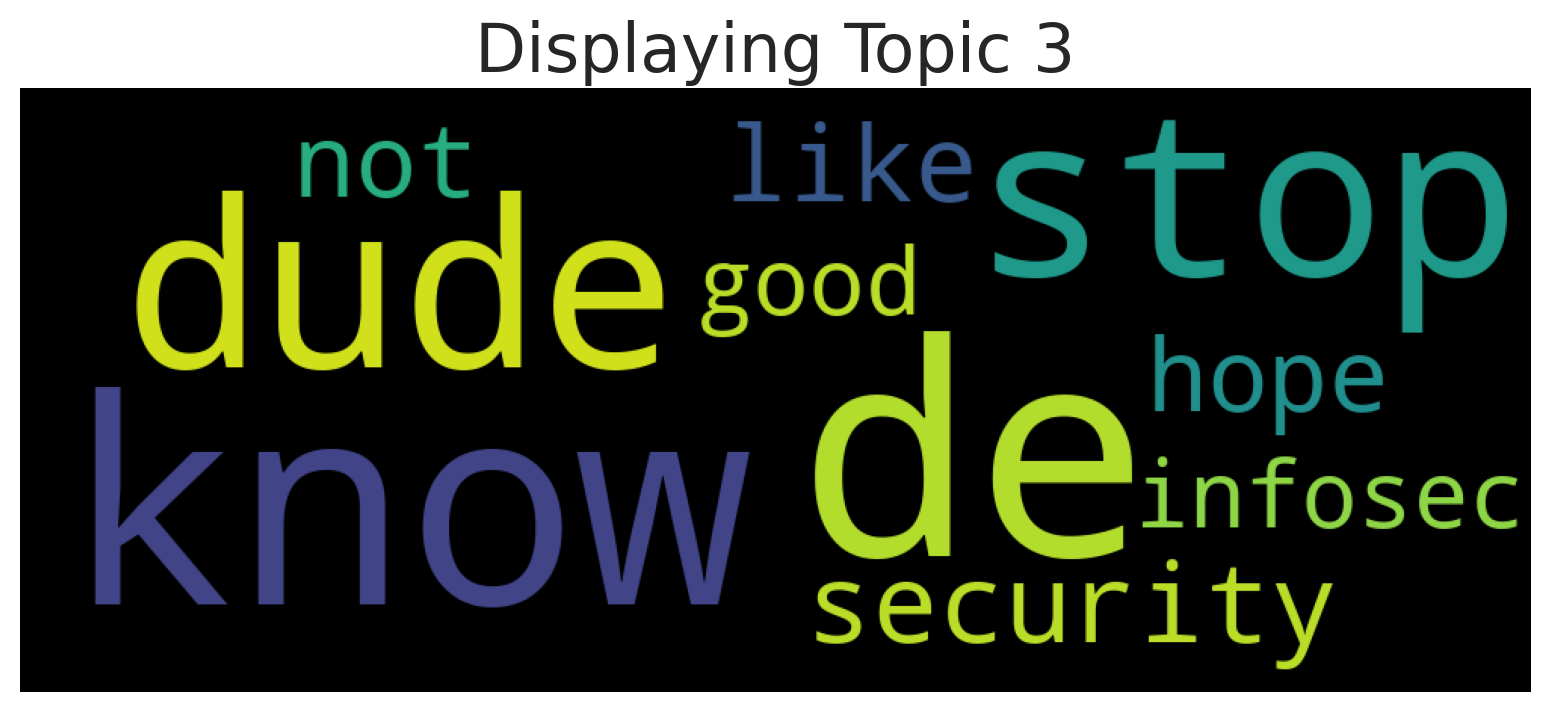

<Figure size 432x288 with 0 Axes>

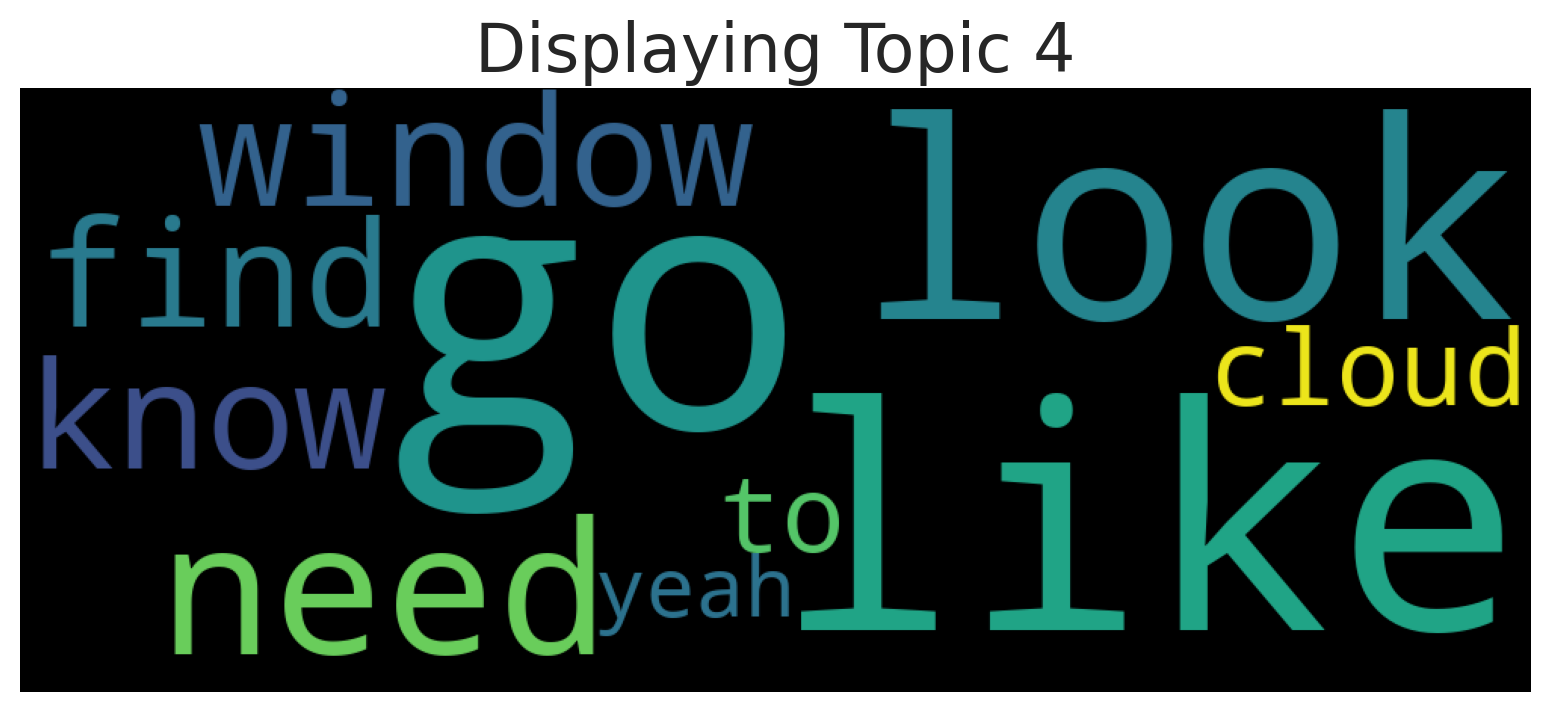

<Figure size 432x288 with 0 Axes>

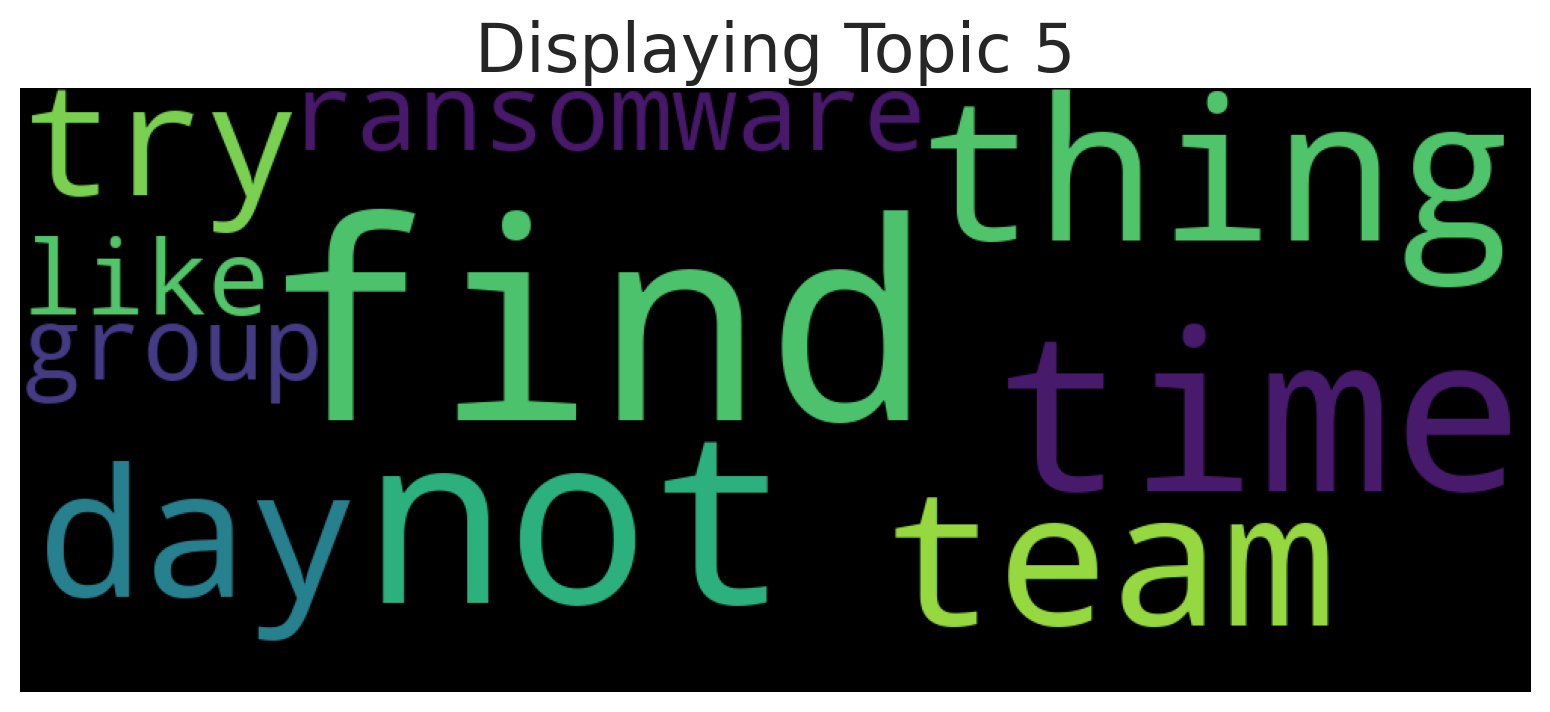

<Figure size 432x288 with 0 Axes>

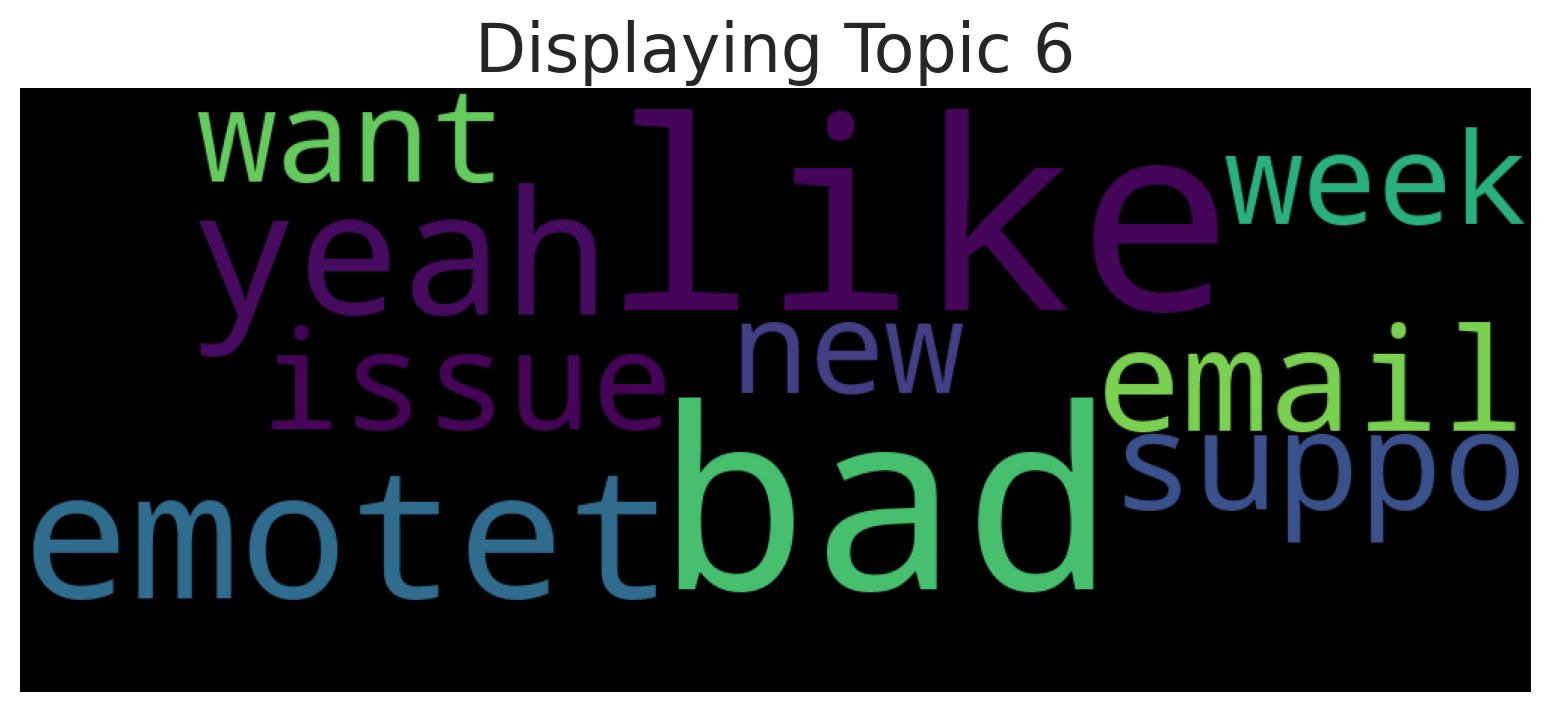

<Figure size 432x288 with 0 Axes>

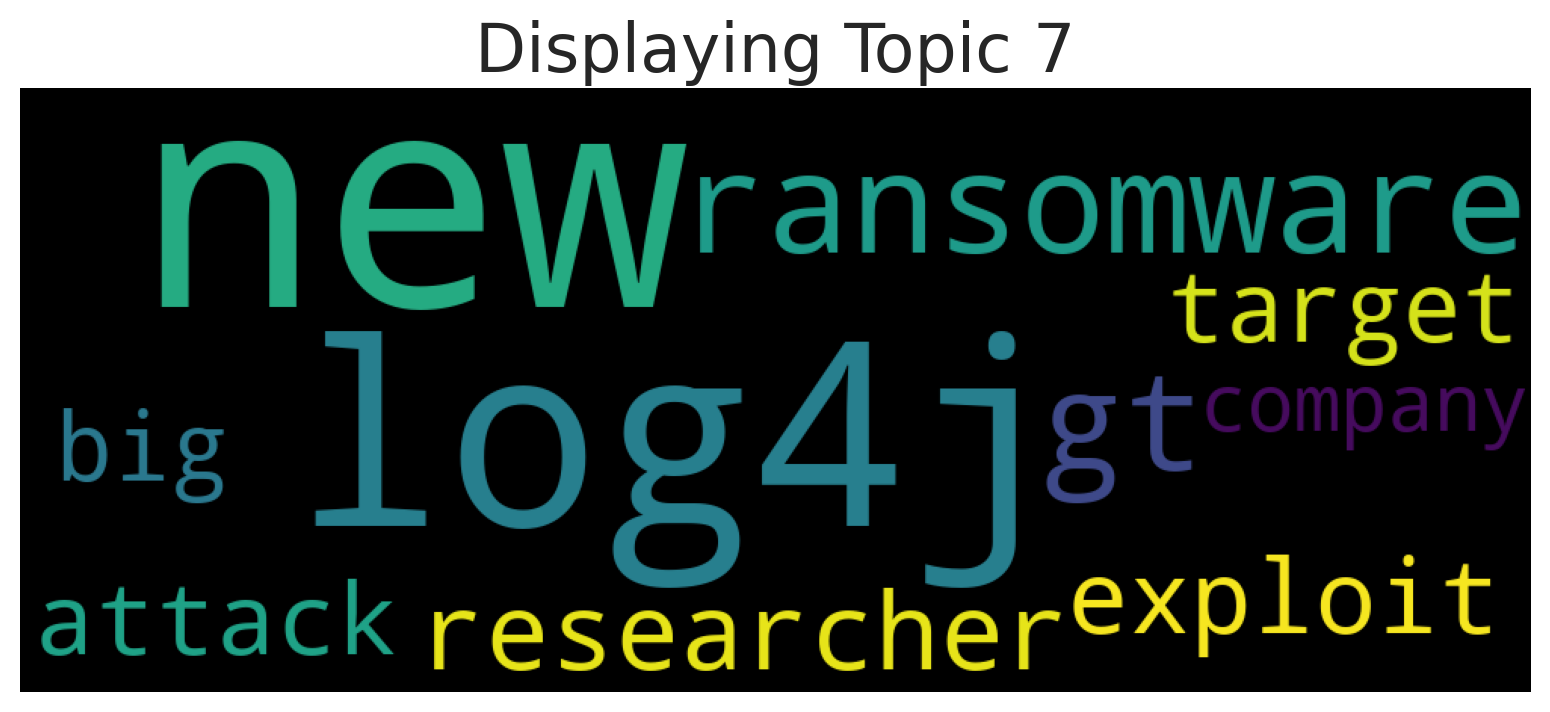

<Figure size 432x288 with 0 Axes>

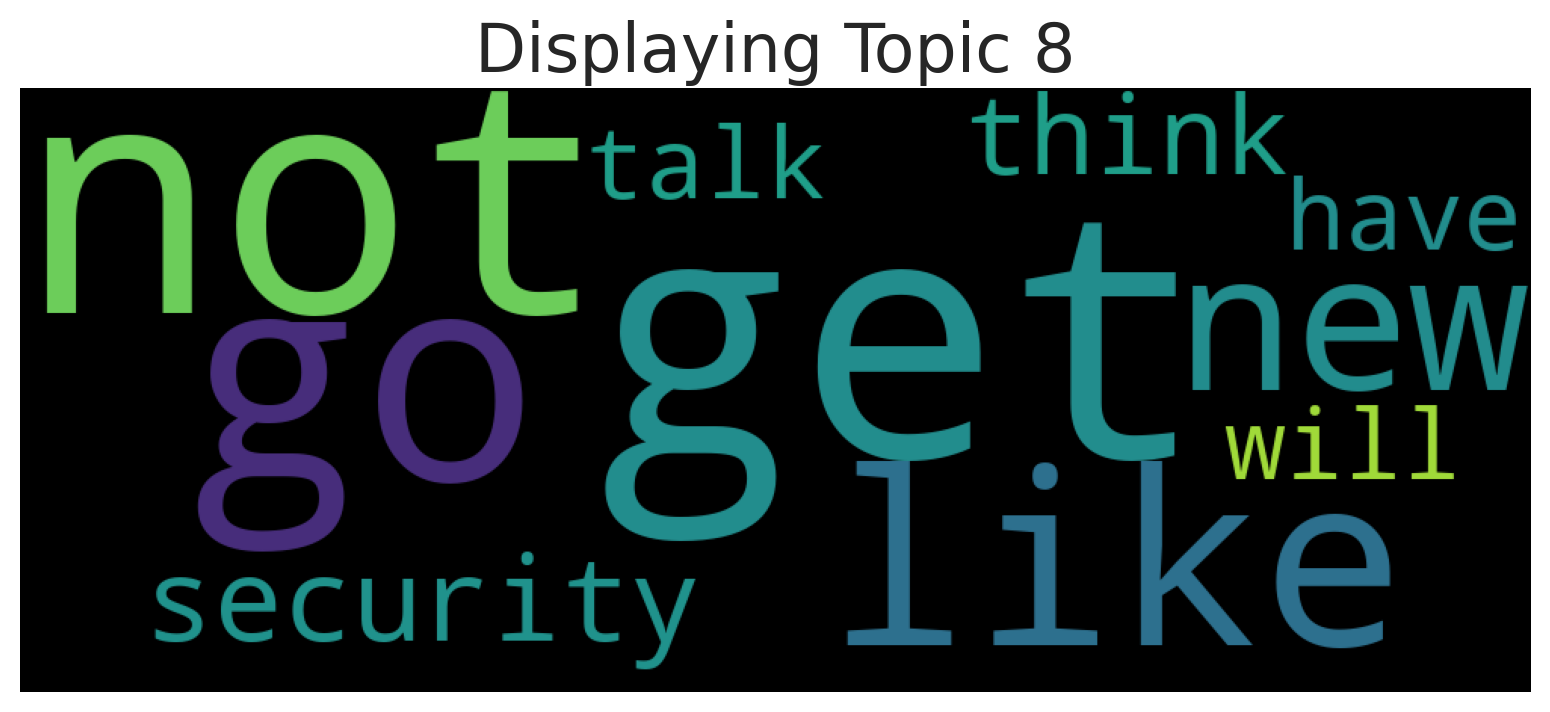

<Figure size 432x288 with 0 Axes>

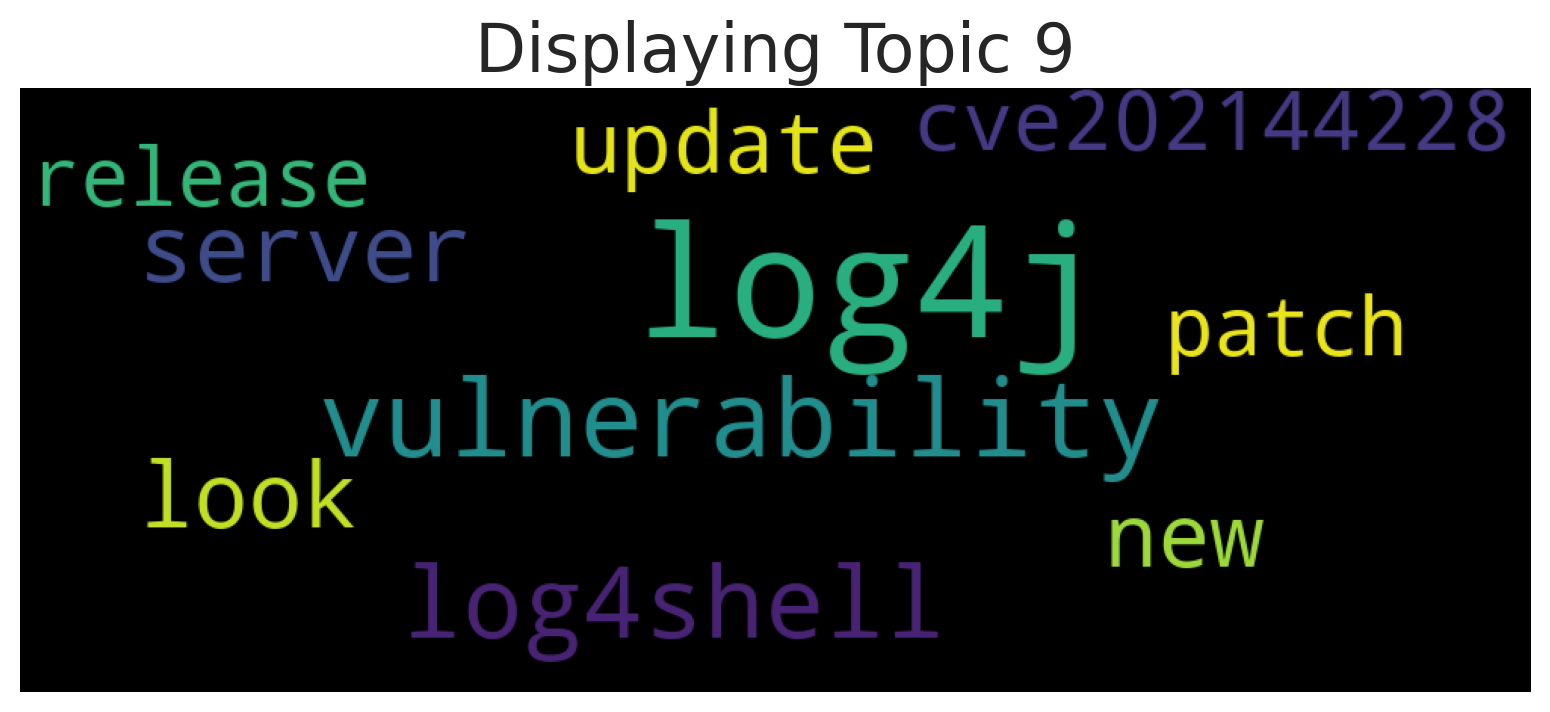

<Figure size 432x288 with 0 Axes>

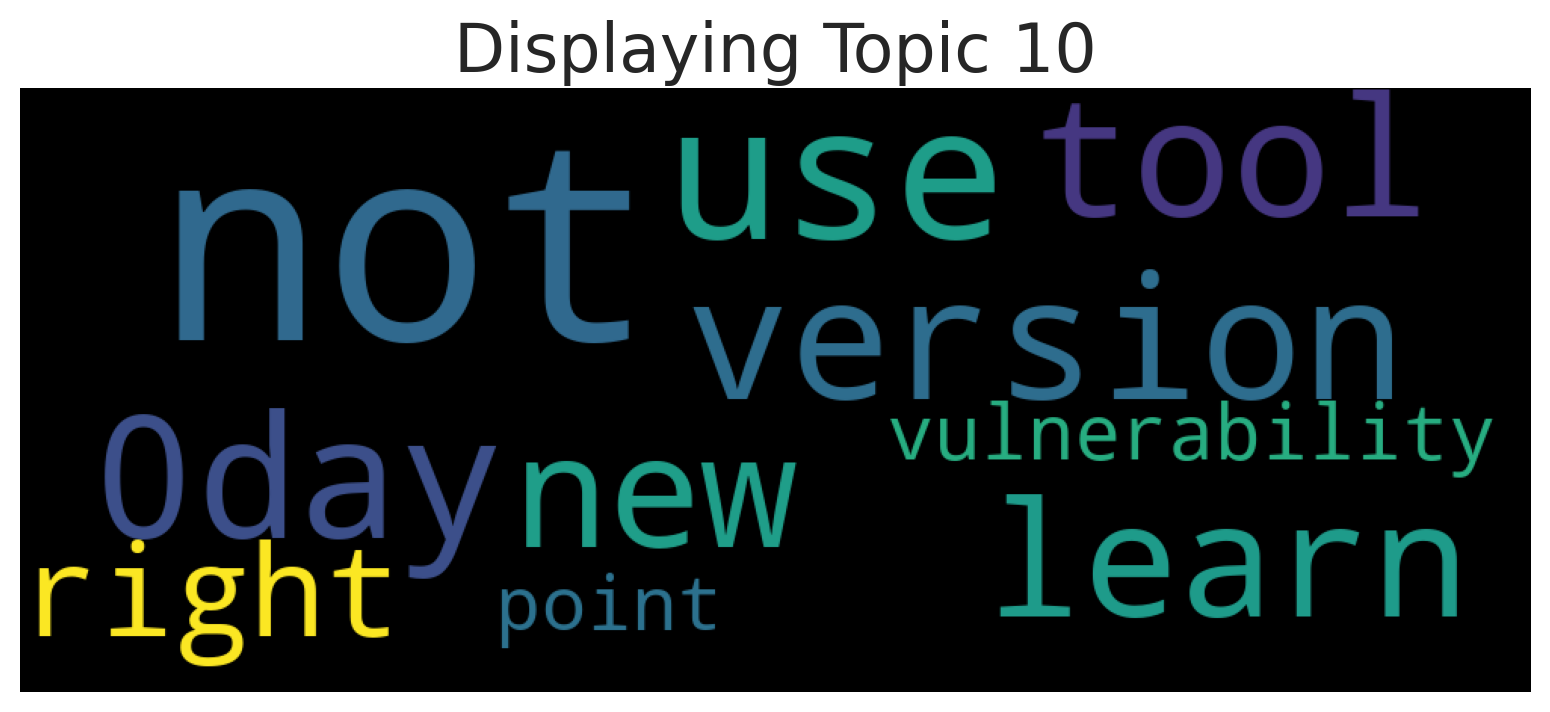

<Figure size 432x288 with 0 Axes>

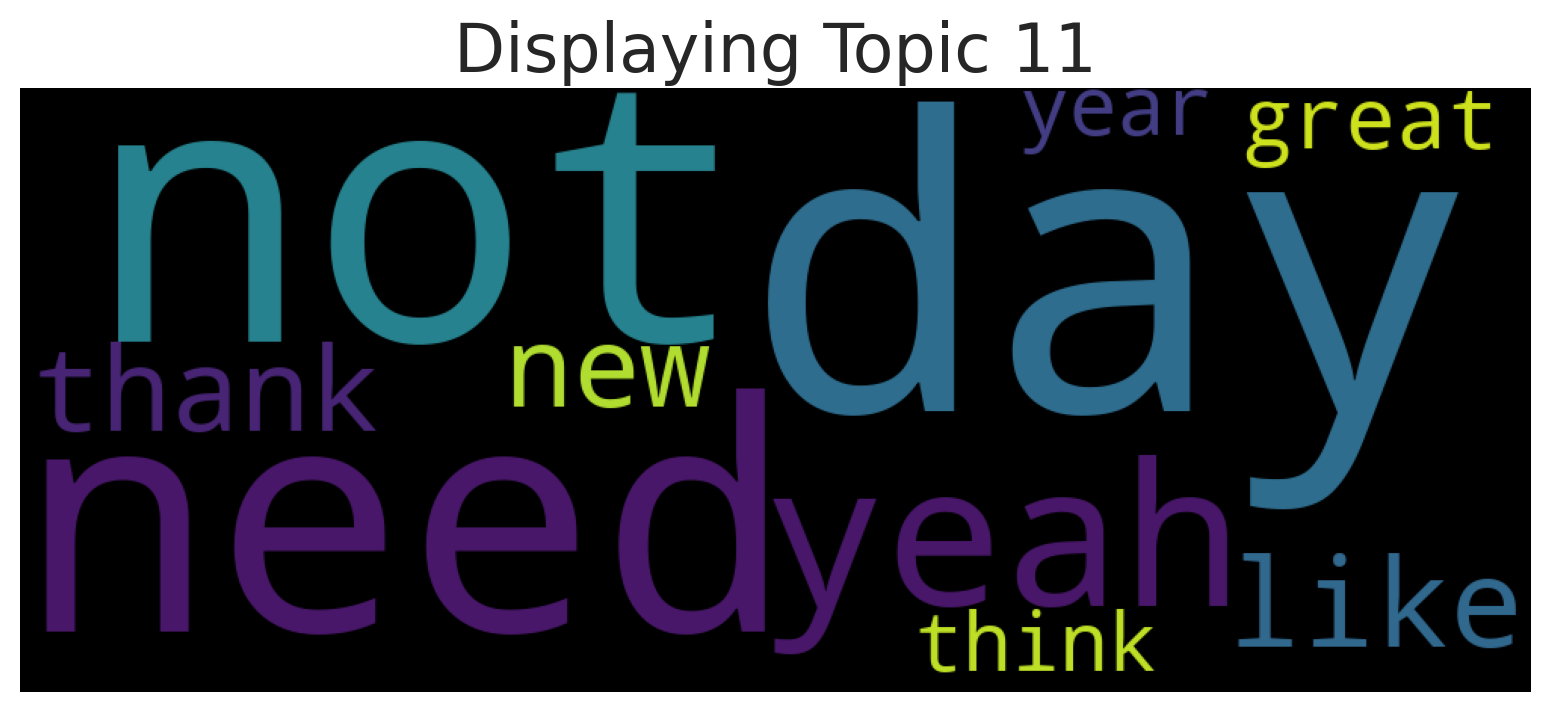

<Figure size 432x288 with 0 Axes>

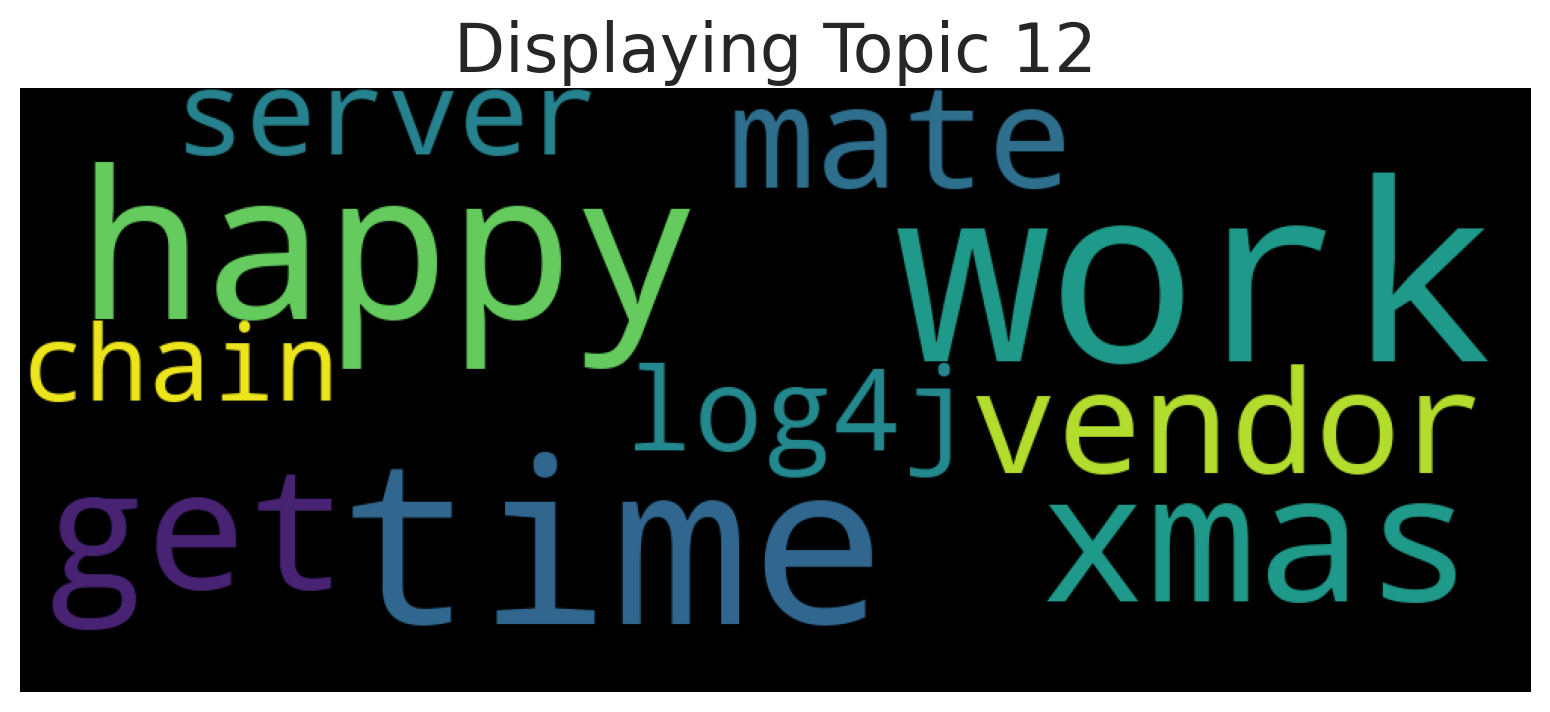

<Figure size 432x288 with 0 Axes>

In [ ]:
#Generate wordclound 
lda_topics = lda_model.show_topics(num_topics=12, num_words=10, log=False, formatted=False)
generate_wordclound(lda_topics)